**Abstract :**

In this report we are proposing solutions to the LPG delivery problem, which is a combinatorial optimization problem that we addressed using a combination of Genetic and Particle Swarm Optimization techniques. With PSO drawing inspiration from animal social behaviours such as bird flocks and GA from nature. Both strategies have been demonstrated to be extremely effective when used to address real-world optimization challenges. Additionally, these algorithms are very versatile, allowing them to address problems with a variety of objective function characteristics, including continuous, discrete, and mixed. Due to their versatility, they can also be utilised to manage many parameters concurrently. These methods begin with a set of initial solutions or an initial population, and then examine a sequence of solutions sequentially in order to arrive at an optimal solution to the problem of scheduling delivery to all customers while minimising overall dispatch time and maximising cost efficiency.

**Introduction :**

There has been an increasing interest in employing genetic algorithms (GA) and particle swarm optimization (PSO) to tackle a variety of single and multi-objective problems in production and operations management that are combinatorial and NP-hard over the years (Moradi M & Abedini, 2011). Particle Swarm Optimization (PSO) has received a lot of interest recently since it has a tremendous search ability and is relatively simple to implement. The standard PSO is modified to incorporate multiple approaches, because premature convergence and stagnation are still issues with this search method (Kuoa R & Linb L, 2010). While Genetic Algorithms (GAs) are a type of search-based optimization approach that is based on the principles of genetics and natural selection. The genetic algorithm is a well-known evolutionary and random-based algorithm that laid the groundwork for current evolutionary computation. By random, we mean that while the GA is used to find a solution, random modifications to current solutions are used to generate new ones (Gad, 2018).


**Problem Statement :**

The problem described comes from a gas distribution company, and it is intended to address a real-world problem of delivery planning for the company LPG (liquefied Petroleum Gas). LPG is the finest alternative solution for heating in regions where mains gas is not available for use in the heating system. LPG distribution businesses purchase the fuel from major oil refineries and transport it to bulk consumers using a fleet of tanker lorry.

For an optimized delivery, we developed a strategy based on GA and PSO, which we described in this solution. It was decided to pursue two goals: (1) To schedule LPG deliveries to all clients while minimising overall dispatch time. (2) To arrange LPG deliveries to all customers in order to achieve cost efficiency while adhering to the limits set forth in the specification.

**The proposed Method for solving the problem :**

The optimization algorithms adopted to solve this problem are GA and PSO, thus the method used is described as follow:

The five given depots as stated in the assignment brief is divided into clusters using K-means Clustering Algorithm. Where, this algorithm will be used to cluster customers locations with respect to locations of depots.
Then we create the network of roads by applying the Nodes(locations) and Edges(Links), which will be used to calculate distinces based on the links exist between customers.
We also take into consideration all constraints and conditions stated in the assignment brief regarding stops  and stops number for the small, medium and large lorry types. In addition, customers tankers will be fully filled.

We therefore initiate.
Task 1 : Minimizing Dispatch time using Genatic Algorithm (GA)

When applying the GA on a depot cluster:


*   The initial population of a defined size, is created from the customers list clustered to that depot. Where, chromosoms in this population, will be the randomly generated customers lists from the assigned customers list of that depot.

*   Using the fitness calculation function, we calculate the delivery time of each chromosome in the created population, by dividng the chromosome (customer list) between that depot's lorries and calculate the delivery time of the depot on that chromosome.  

*   We then select the fittest chromosomes (customers lists) by a selection function.

*   When this is concluded, Pairing is conducted on randomly pairs from the fittest chromosomes selected. Moreover, a random number between 0 and 1 is generated to determine whether crossover should take place or not. After that, offsprings are added to the fittest population.


*   Lastly we generate a random number in range 0 to 1 on each chromosome of the population to determine if mutation will take place on that chromosome.

* Thus, the population is updated, and the previous steps will be iterated for a defined number of generation.

After the optimisation process mentioned above has been carried out on all depots clusters, we therefore use the optimized results to calculate the overall dispatch time.
Thus, if all lorries are delivering gas to customers simultaneously, the overall delivery time will be the greatest minimum depot delivery time obtained above.


The second task is initiated.
Task 2: Maximaizing Cost efficiency using Particle Swarm Optimization Algorithm (PSO)

Similar to previous task, when applying the PSO on a depot cluster:

*  the initial population of particles of a defined population size, is created from the customers list clustered to that depot. Where, particles in this population, will be the randomly generated customers lists from the assigned customers list of that depot.

* Using the cost efficiency function, we calculate the cost efficiency of each particle in the created population, by dividng the particle (customer list) between that depot's lorries and calculate the cost efficiency of the depot on that particle.

* An iteration process is initiated, and for each iteration, each particle will be updated based on its best local cost value, and based on the global cost value as well (best cost efficiency in the population). The velocity for each particle will be also updated over the iterations. Where, the change of the particle velocity here, will change the order of some customers in the customers list of that particle.


  also as effected in GA task, we will apply PSO for each depot cluster to find the max cost efficincy of it, and the sum of results will be the max cost efficiency found for the whole delivery problem.







    






**importing libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from sklearn.cluster import KMeans
import random
import math
import networkx as nx
from pprint import pprint
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

**loading dataset**

In [ ]:
locations = pd.read_csv('SaO_Optilandia_locations.csv')

In [ ]:
locations.head()

,id,x,y,is_depot,is_customer,capacity,level
0,0,49464.6277,5928.80907,False,False,NaN,NaN
1,1,49694.4968,6336.56398,False,False,NaN,NaN
2,2,49568.0405,6390.31359,False,False,NaN,NaN
3,3,49746.6430,6162.56676,False,False,NaN,NaN
4,4,49779.8686,5761.12212,False,False,NaN,NaN


**Calculating Gas Demand for each customer:**

In [ ]:
locations["demand"] = locations["capacity"] - locations["level"]
locations.head(10)

,id,x,y,is_depot,is_customer,capacity,level,demand
0,0,49464.6277,5928.80907,False,False,NaN,NaN,NaN
1,1,49694.4968,6336.56398,False,False,NaN,NaN,NaN
2,2,49568.0405,6390.31359,False,False,NaN,NaN,NaN
3,3,49746.6430,6162.56676,False,False,NaN,NaN,NaN
4,4,49779.8686,5761.12212,False,False,NaN,NaN,NaN
5,5,49712.0961,6362.84900,False,True,0.5,0.4,0.1
6,6,49658.7561,6465.69719,False,False,NaN,NaN,NaN
7,7,49475.8644,6302.06021,False,False,NaN,NaN,NaN
8,8,49581.1158,6252.70212,False,True,2.0,1.8,0.2
9,9,49461.4944,6358.84305,False,False,NaN,NaN,NaN


Since we have five depots with different types of lorries in each, it will be a good idea to divid the whole delivery problem into sub-problems. where each depot could be responsile of delivering gas to a group of customers depending on the locations of customers and depots . To achive that, we will use **k-means clustering algorithm** to cluster customers locations with respect to locations of depots. Where, depots locations are passed to k-means algorithm as the centers, and clusters number is five based on the number of depots. And since we have 125 customers and five depots from the given dataset, customers locations will be clusterd equally  with 25 customers in each cluster. This clustering will be suitable with targeted optimization problems in reducing delivery time and maximizing cost efficiency.

In [ ]:
def get_equal_sized_clusters(X, cluster_size= 25):

  # this function will apply k-means algorithm to cluster customers locations
  # and then will set cluster labels equal to the given cluster size which is 25 in our case.

    x_centers=[49523.45,49555.54,49907.8,49629.4,49702.06]   # depots locations x's
    y_centers=[6236.965,5977.848,5943.96,6319.759,6097.738]  # depots locations y's

    df_centers=pd.DataFrame({'x': x_centers, 'y' : y_centers})  # depots coordinates to be passed as centers for k-means

    centers= df_centers.values

    n_clusters = 5

    kmeans = KMeans(n_clusters, init= centers,n_init=1)  # creating k-means object
    kmeans.fit(X)                                        # applying k-means to our data


    centers = centers.reshape(-1, 1, X.shape[-1]).repeat(cluster_size, 1).reshape(-1, X.shape[-1])
    distance_matrix = cdist(X, centers)
    clusters_labels = linear_sum_assignment(distance_matrix)[1]//cluster_size

    return clusters_labels

**Plotting customers locations before and after clustering**

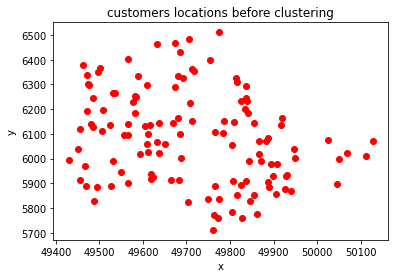

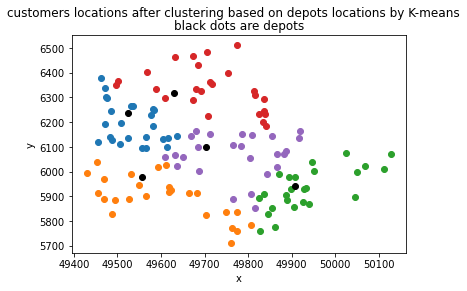

In [ ]:
customer_locations= pd.DataFrame({})
customer_locations=locations[locations['is_customer']==1]  # Extracting customers locations from the dataset

#print(customer_locations)

x_list=customer_locations['x']
y_list=customer_locations['y']
data_set= pd.DataFrame({'x':x_list,'y':y_list})

cluster_labels= get_equal_sized_clusters(data_set)

plt.plot(x_list,y_list, 'ro')  # plot customers locations before clustering
plt.title("customers locations before clustering")
plt.ylabel("y")
plt.xlabel("x")
plt.show(block=True)

data_set= pd.DataFrame({'x':x_list,'y':y_list})

X = pd.DataFrame(data_set)
X['cluster'] = cluster_labels

for k in range(0,5):
    data = X[X["cluster"]==k]
    plt.scatter(data["x"],data["y"])

X1 = [49523.45, 49555.54,49907.8,49629.4,49702.06]
Y1 = [6236.965, 5977.848, 5943.96,6319.759,6097.738]
color=["black"]


plt.scatter(X1, Y1, color=color)  # plot depots locations

plt.suptitle("customers locations after clustering based on depots locations by K-means\n")
plt.title("black dots are depots")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.show(block=True)

**Separate customers with respect to assigned clusters**

In [ ]:
for k in range(0,5):
    data0 = X[X["cluster"]==0]
    data1 = X[X["cluster"]==1]
    data2 = X[X["cluster"]==2]
    data3 = X[X["cluster"]==3]
    data4 = X[X["cluster"]==4]

**Customers assigned to depot 1**

 each customer sub-list from the following customers list consists of: [ customer_id, customer_x, customer_y, customer_demand ].

In [ ]:
customers_locations_in_C0=pd.merge(customer_locations,data0, on=['x','y'])
print(customers_locations_in_C0)
customers_locations_in_C0 = customers_locations_in_C0.drop(['is_customer','is_depot','capacity','level','cluster'], axis=1)
global depot1_customers_list
depot1_customers_list= customers_locations_in_C0.values.tolist()
print('depot 1 customers list:',depot1_customers_list,'\n')
print('depot 1 customers number:', len(depot1_customers_list))

     id           x           y  is_depot  ...  capacity  level  demand  cluster
0     8  49581.1158  6252.70212     False  ...       2.0   1.80    0.20        0
1    27  49473.7340  6300.01926     False  ...       1.5   0.48    1.02        0
2    29  49506.5328  6110.65568     False  ...       1.5   0.96    0.54        0
3    44  49612.5747  6098.26347     False  ...       2.0   1.29    0.71        0
4    70  49508.0740  6197.77764     False  ...       1.5   0.04    1.46        0
5    86  49556.8574  6095.31102     False  ...       1.5   0.47    1.03        0
6    94  49462.6291  6379.60707     False  ...       2.0   0.48    1.52        0
7   136  49486.3938  6128.89089     False  ...       0.5   0.16    0.34        0
8   172  49564.6529  6141.57186     False  ...       1.5   0.59    0.91        0
9   183  49583.3124  6248.74238     False  ...       1.5   1.10    0.40        0
10  225  49576.4210  6230.83363     False  ...       1.5   0.86    0.64        0
11  235  49536.7876  6266.35

**Customers assigned to depot 2**

 each customer sub-list from the following customers list consists of: [ customer_id, customer_x, customer_y, customer_demand ].




In [ ]:
customers_locations_in_C1=pd.merge(customer_locations,data1, on=['x','y'])
print(customers_locations_in_C1)
customers_locations_in_C1 = customers_locations_in_C1.drop(['is_customer','is_depot','capacity','level','cluster'], axis=1)
global depot2_customers_list
depot2_customers_list= customers_locations_in_C1.values.tolist()
print('depot 2 customers list:',depot2_customers_list,'\n')
print('depot 2 customers number:', len(depot2_customers_list))

     id           x           y  is_depot  ...  capacity  level  demand  cluster
0    22  49468.4322  5890.39671     False  ...       2.0   0.32    1.68        1
1    78  49618.9849  5918.07477     False  ...       1.0   0.37    0.63        1
2   100  49531.4131  5991.77185     False  ...       1.5   0.48    1.02        1
3   103  49623.3345  5927.49419     False  ...       1.0   0.56    0.44        1
4   135  49487.7680  5826.92072     False  ...       2.0   0.67    1.33        1
5   144  49494.8158  5885.89169     False  ...       1.0   0.54    0.46        1
6   160  49773.7549  5836.27122     False  ...       1.5   0.59    0.91        1
7   175  49773.2855  5760.73868     False  ...       2.0   0.37    1.63        1
8   180  49611.6185  6025.83336     False  ...       1.5   0.74    0.76        1
9   190  49454.7742  5915.36120     False  ...       2.0   1.64    0.36        1
10  202  49749.4909  5835.59492     False  ...       1.0   0.83    0.17        1
11  205  49683.6347  5912.95

**Customers assigned to depot 3**


each customer sub-list from the following customers list consists of: [ customer_id, customer_x, customer_y, customer_demand ].

In [ ]:
customers_locations_in_C2=pd.merge(customer_locations,data2, on=['x','y'])
print(customers_locations_in_C2)
customers_locations_in_C2 = customers_locations_in_C2.drop(['is_customer','is_depot','capacity','level','cluster'], axis=1)
global depot3_customers_list
depot3_customers_list= customers_locations_in_C2.values.tolist()
print('depot 3 customers list:',depot3_customers_list,'\n')
print('depot 3 customers number:', len(depot3_customers_list))

     id           x           y  is_depot  ...  capacity  level  demand  cluster
0    14  49927.6605  5930.46156     False  ...       1.0   0.67    0.33        2
1    36  49931.6835  5935.73822     False  ...       1.0   0.19    0.81        2
2    63  49861.6653  5777.63550     False  ...       0.5   0.03    0.47        2
3   118  50050.1425  5999.14981     False  ...       1.0   0.29    0.71        2
4   130  49827.1538  5760.97260     False  ...       1.5   0.31    1.19        2
5   147  49871.2247  5989.10040     False  ...       2.0   1.15    0.85        2
6   169  49950.1360  6000.69247     False  ...       2.0   0.60    1.40        2
7   177  50067.2591  6024.40434     False  ...       2.0   0.77    1.23        2
8   204  49925.2499  5875.48563     False  ...       2.0   1.31    0.69        2
9   206  49894.4183  5978.63717     False  ...       1.0   0.12    0.88        2
10  220  49825.7175  5892.08591     False  ...       1.5   0.89    0.61        2
11  254  49907.0144  5980.37

**Customers assigned to depot 4**

each customer sub-list from the following customers list consists of: [ customer_id, customer_x, customer_y, customer_demand ].

In [ ]:
customers_locations_in_C3=pd.merge(customer_locations,data3, on=['x','y'])
print(customers_locations_in_C3)
customers_locations_in_C3 = customers_locations_in_C3.drop(['is_customer','is_depot','capacity','level','cluster'], axis=1)
global depot4_customers_list
depot4_customers_list= customers_locations_in_C3.values.tolist()
print('depot 4 customers list:',depot4_customers_list,'\n')
print('depot 4 customers number:', len(depot4_customers_list))

     id           x           y  is_depot  ...  capacity  level  demand  cluster
0     5  49712.0961  6362.84900     False  ...       0.5   0.40    0.10        3
1    31  49836.2564  6243.34558     False  ...       2.0   1.44    0.56        3
2    41  49673.5864  6466.53212     False  ...       1.5   0.47    1.03        3
3    65  49632.1341  6462.64503     False  ...       1.0   0.28    0.72        3
4    77  49774.1937  6511.04225     False  ...       1.5   0.03    1.47        3
5    82  49502.1687  6367.74391     False  ...       1.5   0.90    0.60        3
6   113  49716.5183  6353.98858     False  ...       1.0   0.55    0.45        3
7   146  49672.9170  6287.68866     False  ...       2.0   0.55    1.45        3
8   243  49824.8895  6232.94834     False  ...       1.0   0.33    0.67        3
9   255  49608.4190  6298.86420     False  ...       0.5   0.33    0.17        3
10  265  49838.6846  6231.86204     False  ...       1.0   0.52    0.48        3
11  308  49753.8897  6400.09

**Customers assigned to depot 5**

each customer sub-list from the following customers list consists of: [ customer_id, customer_x, customer_y, customer_demand ].

In [ ]:
customers_locations_in_C4=pd.merge(customer_locations,data4, on=['x','y'])
print(customers_locations_in_C4)
customers_locations_in_C4 = customers_locations_in_C4.drop(['is_customer','is_depot','capacity','level','cluster'], axis=1)
global depot5_customers_list
depot5_customers_list= customers_locations_in_C4.values.tolist()
print('depot 5 customers list:',depot5_customers_list,'\n')
print('depot 5 customers number:', len(depot5_customers_list))

     id           x           y  is_depot  ...  capacity  level  demand  cluster
0    13  49609.4990  6060.54337     False  ...       1.0   0.80    0.20        4
1    32  49916.4160  6137.33568     False  ...       1.0   0.08    0.92        4
2    64  49853.9758  6142.68630     False  ...       2.0   1.04    0.96        4
3    73  49919.8675  6165.40194     False  ...       0.5   0.27    0.23        4
4    80  49786.3979  6150.22827     False  ...       0.5   0.27    0.23        4
5   105  49883.2837  6070.60470     False  ...       1.5   0.23    1.27        4
6   110  49783.4373  6102.62313     False  ...       2.0   0.01    1.99        4
7   171  49866.4031  6020.64803     False  ...       2.0   0.68    1.32        4
8   200  49637.3721  6023.89652     False  ...       2.0   1.73    0.27        4
9   210  49887.7803  6084.00545     False  ...       1.0   0.53    0.47        4
10  214  49803.8286  6056.41074     False  ...       2.0   0.39    1.61        4
11  245  49815.6403  5853.41

In [ ]:
def distance(location1, location2):

    return math.hypot(location1[1] - location2[1], location1[2] - location2[2])  # this function is to calculate the euclidean distance
                                                                                 # between two locations

In [ ]:
def route_distance(route):
                                                   # this function is to calculate the overall distance of travelling
  route_distance= 0                                # from the first to the last location of a given route

  for location in range(0,len(route)-1):
      route_distance = route_distance + distance(route[location],route[location+1])

  return route_distance

**Creating the Network of Roads**

(Nodes are locations and edges are links)

This network will be used to find the links that connect two customers. all nodes are located with the specified coordinates from Location dataset.

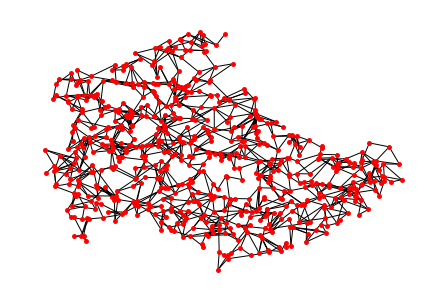

In [ ]:
edges= pd.read_csv('SaO_Optilandia_links.csv')
edges=edges.values.tolist()
#print(edges)

df= pd.DataFrame({'x': locations['x'], 'y': locations['y']})
xy_array = df.values.tolist()
#print(xy_array)

pos = xy_array
G= nx.Graph()
G.add_nodes_from(locations['id'])
G.add_edges_from(edges)
nx.draw(G,pos,node_size=15,node_color='r',font_size=0.001,edge_color='black')

**Example of how to find a route that connecting two customers :**

In [ ]:
locations_dataframe= pd.DataFrame({'id': locations['id'],'x': locations['x'], 'y': locations['y']})

best_route = nx.shortest_path(G,13,32)  # this will find the shortest path connecting two given nodes from the Network graph

sub_route = pd.DataFrame({'id':best_route}).merge(locations_dataframe).values.tolist()  # setting the coordinates for locations from the
                                                                                        # extracted path to calculate overall distance later
print('locations IDs :',best_route,'\n')
print('locations IDs with coordinates :',sub_route)

locations IDs : [13, 256, 102, 158, 469, 316, 201, 80, 514, 64, 313, 228, 32] 

locations IDs with coordinates : [[13.0, 49609.499, 6060.54337], [256.0, 49641.9727, 6047.3494200000005], [102.0, 49672.7931, 6105.5888], [158.0, 49701.1366, 6067.26649], [469.0, 49716.1474, 6122.95918], [316.0, 49746.5294, 6148.38965], [201.0, 49730.324, 6196.1176700000005], [80.0, 49786.3979, 6150.2282700000005], [514.0, 49800.6124, 6162.32958], [64.0, 49853.9758, 6142.6863], [313.0, 49881.4689, 6118.37314], [228.0, 49904.8872, 6170.17071], [32.0, 49916.416, 6137.33568]]


In [ ]:
def dist_between_2_nodes(id1,id2):     # this function will return the overall distance of travelling between two given nodes

  locations_dataframe= pd.DataFrame({'id': locations['id'],'x': locations['x'], 'y': locations['y']})
  best_route = nx.shortest_path(G,id1,id2)
  sub_route = pd.DataFrame({'id':best_route}).merge(locations_dataframe).values.tolist()
  x = route_distance(sub_route)

  return x

**example :**

In [ ]:
dist_between_2_nodes(13,32)

572.6499390734989

In [ ]:
def nearest_depot_dist(id1):

  # this function will return the distance and the ID of the nearest depot to a customer.

  # function input: the ID of the customer who the lorry will travel from to the nearest depot.

  # this function will be used later when the gas demand of the next customer in a route is greater than the gas_level in a lorry.
  # thus, the lorry will find the nearest depot for refilling and then continue in the specified route.

        locations_dataframe= pd.DataFrame({'id': locations['id'],'x': locations['x'], 'y': locations['y']})
        depots_ids= [523,124,373,167,127]
        distances=[]

        for id2 in depots_ids:

           best_route = nx.shortest_path(G,id1,id2)
           sub_route = pd.DataFrame({'id':best_route}).merge(locations_dataframe).values.tolist()
           distances.append([route_distance(sub_route),id2])

           x = min(distances[i[0]] for i in enumerate(distances))

        return x[0],x[1]

**example :**

In [ ]:
nearest_depot_dist(13)

(100.07842738486497, 373)

In [ ]:
def nearest_depot_time(id,stops_number,max_stops_number):

  # this function is to calculate the time needed to reach the nearest depot to a customer. this function will be used when the gas demand
  # of the next customer in a route is greater than the gas_level in a lorry. thus, the lorry will find
  # the nearest depot to refill and then continue in the specified route.

  # function inputs: the id of the customer who the lorry will travel from to the nearest depot,
  # the previous stops_number in the route and the max_stops_number allowed the lorry

  # function outputs: time needed to nearest depot, stops_number added to the previous stops_number in a route and the nearest depot's id.

   locations_dataframe= pd.DataFrame({'id': locations['id'],'x': locations['x'], 'y': locations['y']}) ##
   depots_ids= [523,124,373,167,127]
   distances=[]

   for id2 in depots_ids:

           best_route = nx.shortest_path(G,id,id2)
           sub_route = pd.DataFrame({'id':best_route}).merge(locations_dataframe).values.tolist()
           distances.append([route_distance(sub_route),id2])


   x1 = min(distances[i[0]] for i in enumerate(distances))
   x = x1[0]
   new_stops_number = float(x/100)
   time =0


   if new_stops_number < stops_number:

                  if stops_number + new_stops_number <= max_stops_number:
                     time = time + ((6/5 * x) + (new_stops_number*20))
                     stops_number = stops_number + new_stops_number


                  elif stops_number - new_stops_number <= max_stops_number - stops_number:
                        time = time +((6/5 * x) + (stops_number - new_stops_number)*20)
                        stops_number = stops_number + (stops_number - new_stops_number)


                  elif new_stops_number - stops_number > max_stops_number - stops_number and max_stops_number - stops_number <= max_stops_number:
                       time =time + ((6/5 * x) + (max_stops_number - stops_number)*20)
                       stops_number = stops_number + (max_stops_number - stops_number)



                  else :
                       time = time +(6/5 * x)


   elif new_stops_number - stops_number <= max_stops_number - stops_number:

                      time =time + ((6/5 * x) + (new_stops_number - stops_number)*20)
                      stops_number = stops_number + (stops_number - new_stops_number)


   elif new_stops_number - stops_number > max_stops_number - stops_number and max_stops_number - stops_number <= max_stops_number:
                     time =time + ((6/5 * x) + (max_stops_number - stops_number)*20)
                     stops_number = stops_number + (max_stops_number - stops_number)

   else :

                  time =time +(6/5 * x)



   return time, stops_number, x1[1]

**example :**

In [ ]:
nearest_depot_time(13,2,4)

(140.10979833881095, 3.00078427384865, 373)

In [ ]:
def depot_to_customer_time(id1,id2,stops_number,max_stops_number,demand):

     # this function is to calculate the time needed from the depot to the next customer in a route after refilling gas to the emptied lorry

     # function inputs: id of depot, id of next customer in the route, previous stops_number in the route,
     # max_stops_number allowed to the lorry and gas demand of the next customer.

     # function outputs: time needed from the depot to next customer and the stops number added to the previous stops number in the route.

     # the function is also takes into consideration the times constants provided in the assignment brief.

     x = dist_between_2_nodes(id1,id2)
     new_stops_number = float(x/100)
     time =0


     if new_stops_number < stops_number:

                  if stops_number + new_stops_number <= max_stops_number:

                     time = time + ((6/5 * x) + (10*demand) + 5 + (new_stops_number*20))
                     stops_number = stops_number + new_stops_number



                  elif stops_number - new_stops_number <= max_stops_number - stops_number:
                        time = time + ((6/5 * x) + (10*demand) + 5 + ((stops_number - new_stops_number)*20))
                        stops_number = stops_number + (stops_number - new_stops_number)



                  elif new_stops_number - stops_number > max_stops_number - stops_number and max_stops_number - stops_number <= max_stops_number:
                       time =time + ((6/5 * x) + (10*demand) + 5 + ((max_stops_number - stops_number)*20))
                       stops_number = stops_number + (max_stops_number - stops_number)




                  else :
                       time = time +(6/5 * x) + (10*demand) + 5



     elif new_stops_number - stops_number <= max_stops_number - stops_number:

                      time =time + ((6/5 * x) + (10*demand) + 5 + ((new_stops_number - stops_number)*20))
                      stops_number = stops_number + (stops_number - new_stops_number)



     elif new_stops_number - stops_number > max_stops_number - stops_number and max_stops_number - stops_number <= max_stops_number:
                     time =time + ((6/5 * x) + (10*demand) + 5 + ((max_stops_number - stops_number)*20))
                     stops_number = stops_number + (max_stops_number - stops_number)


     else :

                  time =time +(6/5 * x) + (10*demand) + 5




     return time, stops_number

**Example :**

In [ ]:
depot_to_customer_time(13,124,2,4,0.13)

(731.4730074749758, 4)

**Our implementation is taking into consideration all constraints and conditions stated in the assignment brief regarding stops and stops number for each lorry type and customers tankers will be fully filled.**

In [ ]:
class small_lorry:

 def __init__(self, route):
      self.capacity = 5
      self.cost_mile = 1
      self.cost_mile_tonne = 1.50
      self.max_stops_number = 4
      self.route= route

 def route_time(self):     # this function is to calculate the delivery time of a route assigned to a lorry of small type
                           # the calculation is based on the dispatch time calculating example given in the assignment brief.

     stops_number = 0
     lorry_gas_level = self.capacity
     time= 0

     for customer in range(0,len(self.route)-1):

        x = dist_between_2_nodes(self.route[customer][0],self.route[customer+1][0])

        new_stops_number = float(x/100)   # calculating the number of stops required between two locations according to the condition
                                          # specified in the assignment brief

        if self.route[customer][-1] == self.route[len(self.route)-2][-1] :   # returning from the last customer to the depot

             if new_stops_number < stops_number:

                   if  stops_number + new_stops_number <= self.max_stops_number:
                       time = time + ((6/5 * x) + (new_stops_number*20))
                       stops_number = stops_number + new_stops_number

                   elif stops_number - new_stops_number <= self.max_stops_number - stops_number:
                            time = time + ((6/5 * x) + (stops_number - new_stops_number)*20)
                            stops_number = stops_number + (stops_number - new_stops_number)

                   elif new_stops_number - stops_number > self.max_stops_number - stops_number and self.max_stops_number - stops_number <= self.max_stops_number:
                        time =time + ((6/5 * x) + (self.max_stops_number - stops_number)*20)
                        stops_number = stops_number + (self.max_stops_number - stops_number)


                   else:
                        time = time +(6/5 * x)


             elif new_stops_number - stops_number <= self.max_stops_number - stops_number:
                         time = time +((6/5 * x) + (new_stops_number - stops_number)*20)
                         stops_number = stops_number + (new_stops_number-stops_number)

             elif new_stops_number - stops_number > self.max_stops_number - stops_number and self.max_stops_number - stops_number <= self.max_stops_number:

                     time =time + ((6/5 * x) + (self.max_stops_number - stops_number)*20)
                     stops_number = stops_number + (self.max_stops_number - stops_number)

             else :

                       time = time +(6/5 * x)


        elif stops_number == 0 :

              if stops_number + new_stops_number >= self.max_stops_number:

                 time =time +((6/5 * x) + (10*self.route[customer+1][3]) + 5 + (self.max_stops_number*20))
                 stops_number = self.max_stops_number
                 lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

              else :

                 time = time +((6/5 * x) + (10*self.route[customer+1][3]) + 5 + (new_stops_number)*20)
                 stops_number = stops_number + new_stops_number
                 lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

        elif self.route[customer+1][3] > lorry_gas_level :  # gas demand of the next customer is greater than the gas_level in the lorry

                 refill_time, stops_number,id1 = nearest_depot_time(self.route[customer][0],stops_number,self.max_stops_number) # time to the nearest depot
                 time = time + refill_time


                 time1, stops_number = depot_to_customer_time(id1,self.route[customer+1][0],stops_number,
                                                           self.max_stops_number,self.route[customer+1][3]) # time from the nearest depot to the next customer
                 time = time + time1
                 lorry_gas_level = self.capacity - self.route[customer+1][3]

                 #self.route.insert(customer+1,[id1,+(self.capacity-lorry_gas_level)]) (( will add this to the route later in the view_routes function ))

        else :
             if new_stops_number < stops_number:

                  if stops_number + new_stops_number <= self.max_stops_number:
                     time = time + ((6/5 * x) + (10*self.route[customer+1][3]) + 5 + (new_stops_number*20))
                     stops_number = stops_number + new_stops_number
                     lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

                  elif stops_number - new_stops_number <= self.max_stops_number - stops_number:
                        time = time +((6/5 * x) + (10*self.route[customer+1][3]) + 5 + ((stops_number - new_stops_number)*20))
                        stops_number = stops_number + (stops_number - new_stops_number)
                        lorry_gas_level = lorry_gas_level - self.route[customer+1][3]


                  elif new_stops_number - stops_number > self.max_stops_number - stops_number and self.max_stops_number - stops_number <= self.max_stops_number:
                       time =time + ((6/5 * x) + (10*self.route[customer+1][3]) + 5 + ((self.max_stops_number - stops_number)*20))
                       stops_number = stops_number + (self.max_stops_number - stops_number)
                       lorry_gas_level = lorry_gas_level - self.route[customer+1][3]


                  else :
                       time = time +((6/5 * x) + (10*self.route[customer+1][3]) + 5)
                       lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

             elif new_stops_number - stops_number <= self.max_stops_number - stops_number:

                      time =time + ((6/5 * x) + (10*self.route[customer+1][3]) + 5 + ((new_stops_number - stops_number)*20))
                      stops_number = stops_number + (stops_number - new_stops_number)
                      lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

             elif new_stops_number - stops_number > self.max_stops_number - stops_number and self.max_stops_number - stops_number <= self.max_stops_number:
                     time =time + ((6/5 * x) + (10*self.route[customer+1][3]) + 5 + ((self.max_stops_number - stops_number)*20))
                     stops_number = stops_number + (self.max_stops_number - stops_number)
                     lorry_gas_level = lorry_gas_level - self.route[customer+1][3]
             else :

                  time =time +((6/5 * x) + (10*self.route[customer+1][3]) + 5)
                  lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

     return time, stops_number, lorry_gas_level, self.route


 def route_cost_efficiency(self):     # this function is to calculate the cost efficiency of a route assigned to a lorry of small type
                                      # the delivery cost calculation is based on the cost calculating example given in the assignment brief.

    lorry_gas_level = self.capacity
    total_gas_delivered = 0
    overall_delivery_cost = 0
    cost_efficiency= 0

    for customer in range(0,len(self.route)-1):

        x = dist_between_2_nodes(self.route[customer][0],self.route[customer+1][0])


        if self.route[customer][-1] == self.route[len(self.route)-2][-1] :  # from the last customer to depot

           delivery_cost = (x * (self.cost_mile + (self.cost_mile_tonne * lorry_gas_level)))

           overall_delivery_cost = overall_delivery_cost + delivery_cost


        elif  self.route[customer+1][3] > lorry_gas_level : # gas demand of the next customer is greater than the gas_level in the lorry

                x1,id1 = nearest_depot_dist(self.route[customer][0]) # distance to the nearest depot

                lorry_gas_level = self.capacity - self.route[customer+1][3] # after refill

                delivery_cost = (x1*self.cost_mile) + \
                (dist_between_2_nodes(id1,self.route[customer+1][0])* (self.cost_mile + (self.cost_mile_tonne * self.capacity)))


                total_gas_delivered = total_gas_delivered +  self.route[customer+1][3]
                overall_delivery_cost = overall_delivery_cost + delivery_cost

                #self.route.insert(customer+1,[id1,+(self.capacity-lorry_gas_level)]) (( will add this to the route later in the view_routes function ))


        else :

           delivery_cost = (x * (self.cost_mile + (self.cost_mile_tonne * lorry_gas_level)))
           lorry_gas_level = lorry_gas_level - self.route[customer+1][3]
           total_gas_delivered = total_gas_delivered +  self.route[customer+1][3]
           overall_delivery_cost = overall_delivery_cost + delivery_cost

    cost_efficiency = (cost_efficiency - (total_gas_delivered/overall_delivery_cost))

    return cost_efficiency, lorry_gas_level, self.route, overall_delivery_cost, total_gas_delivered


 def view_route(self):     # this function will be used to view the route of the lorry after applying time and cost_efficiency functions

   lorry_gas_level = self.capacity

   for customer in range(len(self.route)-1):

     if self.route[customer][-1] == self.route[len(self.route)-2][-1] :  # from the last customer to the depot

         self.route[customer+1].append(lorry_gas_level)

     elif self.route[customer+1][3] > lorry_gas_level :  # gas demand of the next customer is greater than the gas_level in the lorry

         x1,id1 = nearest_depot_dist(self.route[customer][0])

         lorry_gas_level = self.capacity - self.route[customer+1][3]

         self.route.insert(customer+1,[id1,+(self.capacity-lorry_gas_level)])

     else:

        lorry_gas_level = lorry_gas_level - self.route[customer+1][3]


   self.route[0].append(self.capacity)


   return self.route


In [ ]:
class med_lorry:

 def __init__(self, route):
      self.capacity = 12
      self.cost_mile = 1.60
      self.cost_mile_tonne = 1
      self.max_stops_number = 8
      self.route= route

 def route_time(self):     # this function is to calculate the delivery time of a route assigned to a lorry of medium type
                           # the calculation is based on the dispatch time calculating example given in the assignment brief.

     stops_number = 0
     lorry_gas_level = self.capacity
     time= 0

     for customer in range(0,len(self.route)-1):

        x = dist_between_2_nodes(self.route[customer][0],self.route[customer+1][0])

        new_stops_number = float(x/100)   # calculating the number of stops required between two locations according to the condition
                                          # specified in the assignment brief

        if self.route[customer][-1] == self.route[len(self.route)-2][-1] :   # returning from the last customer to the depot

             if new_stops_number < stops_number:

                   if  stops_number + new_stops_number <= self.max_stops_number:
                       time = time + ((6/5 * x) + (new_stops_number*20))
                       stops_number = stops_number + new_stops_number

                   elif stops_number - new_stops_number <= self.max_stops_number - stops_number:
                            time = time + ((6/5 * x) + (stops_number - new_stops_number)*20)
                            stops_number = stops_number + (stops_number - new_stops_number)

                   elif new_stops_number - stops_number > self.max_stops_number - stops_number and self.max_stops_number - stops_number <= self.max_stops_number:
                        time =time + ((6/5 * x) + (self.max_stops_number - stops_number)*20)
                        stops_number = stops_number + (self.max_stops_number - stops_number)


                   else:
                        time = time +(6/5 * x)


             elif new_stops_number - stops_number <= self.max_stops_number - stops_number:
                         time = time +((6/5 * x) + (new_stops_number - stops_number)*20)
                         stops_number = stops_number + (new_stops_number-stops_number)

             elif new_stops_number - stops_number > self.max_stops_number - stops_number and self.max_stops_number - stops_number <= self.max_stops_number:

                     time =time + ((6/5 * x) + (self.max_stops_number - stops_number)*20)
                     stops_number = stops_number + (self.max_stops_number - stops_number)

             else :

                       time = time +(6/5 * x)


        elif stops_number == 0 :

              if stops_number + new_stops_number >= self.max_stops_number:

                 time =time +((6/5 * x) + (10*self.route[customer+1][3]) + 5 + (self.max_stops_number*20))
                 stops_number = self.max_stops_number
                 lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

              else :

                 time = time +((6/5 * x) + (10*self.route[customer+1][3]) + 5 + (new_stops_number)*20)
                 stops_number = stops_number + new_stops_number
                 lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

        elif self.route[customer+1][3] > lorry_gas_level :  # gas demand of the next customer is greater than the gas_level in the lorry

                 refill_time, stops_number,id1 = nearest_depot_time(self.route[customer][0],stops_number,self.max_stops_number) # time to the nearest depot
                 time = time + refill_time


                 time1, stops_number = depot_to_customer_time(id1,self.route[customer+1][0],stops_number,
                                                           self.max_stops_number,self.route[customer+1][3]) # time from the nearest depot to the next customer
                 time = time + time1
                 lorry_gas_level = self.capacity - self.route[customer+1][3]

                 #self.route.insert(customer+1,[id1,+(self.capacity-lorry_gas_level)]) (( will add this to the route later in the view_routes function ))

        else :
             if new_stops_number < stops_number:

                  if stops_number + new_stops_number <= self.max_stops_number:
                     time = time + ((6/5 * x) + (10*self.route[customer+1][3]) + 5 + (new_stops_number*20))
                     stops_number = stops_number + new_stops_number
                     lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

                  elif stops_number - new_stops_number <= self.max_stops_number - stops_number:
                        time = time +((6/5 * x) + (10*self.route[customer+1][3]) + 5 + ((stops_number - new_stops_number)*20))
                        stops_number = stops_number + (stops_number - new_stops_number)
                        lorry_gas_level = lorry_gas_level - self.route[customer+1][3]


                  elif new_stops_number - stops_number > self.max_stops_number - stops_number and self.max_stops_number - stops_number <= self.max_stops_number:
                       time =time + ((6/5 * x) + (10*self.route[customer+1][3]) + 5 + ((self.max_stops_number - stops_number)*20))
                       stops_number = stops_number + (self.max_stops_number - stops_number)
                       lorry_gas_level = lorry_gas_level - self.route[customer+1][3]


                  else :
                       time = time +((6/5 * x) + (10*self.route[customer+1][3]) + 5)
                       lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

             elif new_stops_number - stops_number <= self.max_stops_number - stops_number:

                      time =time + ((6/5 * x) + (10*self.route[customer+1][3]) + 5 + ((new_stops_number - stops_number)*20))
                      stops_number = stops_number + (stops_number - new_stops_number)
                      lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

             elif new_stops_number - stops_number > self.max_stops_number - stops_number and self.max_stops_number - stops_number <= self.max_stops_number:
                     time =time + ((6/5 * x) + (10*self.route[customer+1][3]) + 5 + ((self.max_stops_number - stops_number)*20))
                     stops_number = stops_number + (self.max_stops_number - stops_number)
                     lorry_gas_level = lorry_gas_level - self.route[customer+1][3]
             else :

                  time =time +((6/5 * x) + (10*self.route[customer+1][3]) + 5)
                  lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

     return time, stops_number, lorry_gas_level, self.route


 def route_cost_efficiency(self):     # this function is to calculate the cost efficiency of a route assigned to a lorry of medium type
                                      # the delivery cost calculation is based on the cost calculating example given in the assignment brief.

    lorry_gas_level = self.capacity
    total_gas_delivered = 0
    overall_delivery_cost = 0
    cost_efficiency= 0

    for customer in range(0,len(self.route)-1):

        x = dist_between_2_nodes(self.route[customer][0],self.route[customer+1][0])


        if self.route[customer][-1] == self.route[len(self.route)-2][-1] :  # from the last customer to depot

           delivery_cost = (x * (self.cost_mile + (self.cost_mile_tonne * lorry_gas_level)))

           overall_delivery_cost = overall_delivery_cost + delivery_cost


        elif  self.route[customer+1][3] > lorry_gas_level : # gas demand of the next customer is greater than the gas_level in the lorry

                x1,id1 = nearest_depot_dist(self.route[customer][0]) # distance to the nearest depot

                lorry_gas_level = self.capacity - self.route[customer+1][3] # after refill

                delivery_cost = (x1*self.cost_mile) + \
                (dist_between_2_nodes(id1,self.route[customer+1][0])* (self.cost_mile + (self.cost_mile_tonne * self.capacity)))


                total_gas_delivered = total_gas_delivered +  self.route[customer+1][3]
                overall_delivery_cost = overall_delivery_cost + delivery_cost

                #self.route.insert(customer+1,[id1,+(self.capacity-lorry_gas_level)]) (( will add this to the route later in the view_routes function ))


        else :

           delivery_cost = (x * (self.cost_mile + (self.cost_mile_tonne * lorry_gas_level)))
           lorry_gas_level = lorry_gas_level - self.route[customer+1][3]
           total_gas_delivered = total_gas_delivered +  self.route[customer+1][3]
           overall_delivery_cost = overall_delivery_cost + delivery_cost

    cost_efficiency = (cost_efficiency - (total_gas_delivered/overall_delivery_cost))

    return cost_efficiency, lorry_gas_level, self.route, overall_delivery_cost, total_gas_delivered


 def view_route(self):     # this function will be used to view the route of the lorry after applying time and cost_efficiency functions

   lorry_gas_level = self.capacity

   for customer in range(len(self.route)-1):

     if self.route[customer][-1] == self.route[len(self.route)-2][-1] :  # from the last customer to the depot

         self.route[customer+1].append(lorry_gas_level)

     elif self.route[customer+1][3] > lorry_gas_level :  # gas demand of the next customer is greater than the gas_level in the lorry

         x1,id1 = nearest_depot_dist(self.route[customer][0])

         lorry_gas_level = self.capacity - self.route[customer+1][3]

         self.route.insert(customer+1,[id1,+(self.capacity-lorry_gas_level)])

     else:

        lorry_gas_level = lorry_gas_level - self.route[customer+1][3]


   self.route[0].append(self.capacity)


   return self.route


In [ ]:
class large_lorry:

 def __init__(self, route):
      self.capacity = 22
      self.cost_mile = 2.20
      self.cost_mile_tonne = 0.50
      self.max_stops_number = 16
      self.route= route


 def route_time(self):     # this function is to calculate the delivery time of a route assigned to a lorry of larg type
                           # the calculation is based on the dispatch time calculating example given in the assignment brief.

     stops_number = 0
     lorry_gas_level = self.capacity
     time= 0

     for customer in range(0,len(self.route)-1):

        x = dist_between_2_nodes(self.route[customer][0],self.route[customer+1][0])

        new_stops_number = float(x/100)   # calculating the number of stops required between two locations according to the condition
                                          # specified in the assignment brief

        if self.route[customer][-1] == self.route[len(self.route)-2][-1] :   # returning from the last customer to the depot

             if new_stops_number < stops_number:

                   if  stops_number + new_stops_number <= self.max_stops_number:
                       time = time + ((6/5 * x) + (new_stops_number*20))
                       stops_number = stops_number + new_stops_number

                   elif stops_number - new_stops_number <= self.max_stops_number - stops_number:
                            time = time + ((6/5 * x) + (stops_number - new_stops_number)*20)
                            stops_number = stops_number + (stops_number - new_stops_number)

                   elif new_stops_number - stops_number > self.max_stops_number - stops_number and self.max_stops_number - stops_number <= self.max_stops_number:
                        time =time + ((6/5 * x) + (self.max_stops_number - stops_number)*20)
                        stops_number = stops_number + (self.max_stops_number - stops_number)


                   else:
                        time = time +(6/5 * x)


             elif new_stops_number - stops_number <= self.max_stops_number - stops_number:
                         time = time +((6/5 * x) + (new_stops_number - stops_number)*20)
                         stops_number = stops_number + (new_stops_number-stops_number)

             elif new_stops_number - stops_number > self.max_stops_number - stops_number and self.max_stops_number - stops_number <= self.max_stops_number:

                     time =time + ((6/5 * x) + (self.max_stops_number - stops_number)*20)
                     stops_number = stops_number + (self.max_stops_number - stops_number)

             else :

                       time = time +(6/5 * x)


        elif stops_number == 0 :

              if stops_number + new_stops_number >= self.max_stops_number:

                 time =time +((6/5 * x) + (10*self.route[customer+1][3]) + 5 + (self.max_stops_number*20))
                 stops_number = self.max_stops_number
                 lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

              else :

                 time = time +((6/5 * x) + (10*self.route[customer+1][3]) + 5 + (new_stops_number)*20)
                 stops_number = stops_number + new_stops_number
                 lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

        elif self.route[customer+1][3] > lorry_gas_level :  # gas demand of the next customer is greater than the gas_level in the lorry

                 refill_time, stops_number,id1 = nearest_depot_time(self.route[customer][0],stops_number,self.max_stops_number) # time to the nearest depot
                 time = time + refill_time


                 time1, stops_number = depot_to_customer_time(id1,self.route[customer+1][0],stops_number,
                                                           self.max_stops_number,self.route[customer+1][3]) # time from the nearest depot to the next customer
                 time = time + time1
                 lorry_gas_level = self.capacity - self.route[customer+1][3]

                 #self.route.insert(customer+1,[id1,+(self.capacity-lorry_gas_level)]) (( will add this to the route later in the view_routes function ))

        else :
             if new_stops_number < stops_number:

                  if stops_number + new_stops_number <= self.max_stops_number:
                     time = time + ((6/5 * x) + (10*self.route[customer+1][3]) + 5 + (new_stops_number*20))
                     stops_number = stops_number + new_stops_number
                     lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

                  elif stops_number - new_stops_number <= self.max_stops_number - stops_number:
                        time = time +((6/5 * x) + (10*self.route[customer+1][3]) + 5 + ((stops_number - new_stops_number)*20))
                        stops_number = stops_number + (stops_number - new_stops_number)
                        lorry_gas_level = lorry_gas_level - self.route[customer+1][3]


                  elif new_stops_number - stops_number > self.max_stops_number - stops_number and self.max_stops_number - stops_number <= self.max_stops_number:
                       time =time + ((6/5 * x) + (10*self.route[customer+1][3]) + 5 + ((self.max_stops_number - stops_number)*20))
                       stops_number = stops_number + (self.max_stops_number - stops_number)
                       lorry_gas_level = lorry_gas_level - self.route[customer+1][3]


                  else :
                       time = time +((6/5 * x) + (10*self.route[customer+1][3]) + 5)
                       lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

             elif new_stops_number - stops_number <= self.max_stops_number - stops_number:

                      time =time + ((6/5 * x) + (10*self.route[customer+1][3]) + 5 + ((new_stops_number - stops_number)*20))
                      stops_number = stops_number + (stops_number - new_stops_number)
                      lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

             elif new_stops_number - stops_number > self.max_stops_number - stops_number and self.max_stops_number - stops_number <= self.max_stops_number:
                     time =time + ((6/5 * x) + (10*self.route[customer+1][3]) + 5 + ((self.max_stops_number - stops_number)*20))
                     stops_number = stops_number + (self.max_stops_number - stops_number)
                     lorry_gas_level = lorry_gas_level - self.route[customer+1][3]
             else :

                  time =time +((6/5 * x) + (10*self.route[customer+1][3]) + 5)
                  lorry_gas_level = lorry_gas_level - self.route[customer+1][3]

     return time, stops_number, lorry_gas_level, self.route


 def route_cost_efficiency(self):     # this function is to calculate the cost efficiency of a route assigned to a lorry of larg type
                                      # the delivery cost calculation is based on the cost calculating example given in the assignment brief.

    lorry_gas_level = self.capacity
    total_gas_delivered = 0
    overall_delivery_cost = 0
    cost_efficiency= 0

    for customer in range(0,len(self.route)-1):

        x = dist_between_2_nodes(self.route[customer][0],self.route[customer+1][0])


        if self.route[customer][-1] == self.route[len(self.route)-2][-1] :  # from the last customer to depot

           delivery_cost = (x * (self.cost_mile + (self.cost_mile_tonne * lorry_gas_level)))

           overall_delivery_cost = overall_delivery_cost + delivery_cost


        elif  self.route[customer+1][3] > lorry_gas_level : # gas demand of the next customer is greater than the gas_level in the lorry

                x1,id1 = nearest_depot_dist(self.route[customer][0]) # distance to the nearest depot

                lorry_gas_level = self.capacity - self.route[customer+1][3] # after refill

                delivery_cost = (x1*self.cost_mile) + \
                (dist_between_2_nodes(id1,self.route[customer+1][0])* (self.cost_mile + (self.cost_mile_tonne * self.capacity)))


                total_gas_delivered = total_gas_delivered +  self.route[customer+1][3]
                overall_delivery_cost = overall_delivery_cost + delivery_cost

                #self.route.insert(customer+1,[id1,+(self.capacity-lorry_gas_level)]) (( will add this to the route later in the view_routes function ))


        else :

           delivery_cost = (x * (self.cost_mile + (self.cost_mile_tonne * lorry_gas_level)))
           lorry_gas_level = lorry_gas_level - self.route[customer+1][3]
           total_gas_delivered = total_gas_delivered +  self.route[customer+1][3]
           overall_delivery_cost = overall_delivery_cost + delivery_cost

    cost_efficiency = (cost_efficiency - (total_gas_delivered/overall_delivery_cost))

    return cost_efficiency, lorry_gas_level, self.route, overall_delivery_cost, total_gas_delivered


 def view_route(self):     # this function will be used to view the route of the lorry after applying time and cost_efficiency functions

   lorry_gas_level = self.capacity

   for customer in range(len(self.route)-1):

     if self.route[customer][-1] == self.route[len(self.route)-2][-1] :  # from the last customer to the depot

         self.route[customer+1].append(lorry_gas_level)

     elif self.route[customer+1][3] > lorry_gas_level :  # gas demand of the next customer is greater than the gas_level in the lorry

         x1,id1 = nearest_depot_dist(self.route[customer][0])

         lorry_gas_level = self.capacity - self.route[customer+1][3]

         self.route.insert(customer+1,[id1,+(self.capacity-lorry_gas_level)])

     else:

        lorry_gas_level = lorry_gas_level - self.route[customer+1][3]


   self.route[0].append(self.capacity)


   return self.route



In [ ]:
class depot:

      def __init__(self,id,customers_list,sml_lorry_no,med_lorry_no,larg_lorry_no):
         self.id = id
         self.customers_list = customers_list
         self.sml_lorry_no = sml_lorry_no
         self.med_lorry_no = med_lorry_no
         self.larg_lorry_no = larg_lorry_no

      def divide_customers(self):     # this function will divide customers allocated to a depot into five routes
                                      # these five routes will be assigned to the depot's lorries

          global sub_routes

          length = len(self.customers_list)
          sub_routes = [ self.customers_list[i*length // 5: (i+1)*length // 5]
                    for i in range(5) ]

          return sub_routes


      def assign_routes(self):       # this function will first create objects of different types of lorries from the above classes depending on
                                     # the specified number of each type. each lorry is created with a route from the given customers list.

          global sml_lorries, med_lorries, larg_lorries

          sml_lorries=[]
          med_lorries=[]
          larg_lorries=[]

          # creating lorries objects:

          for j in range(0, self.sml_lorry_no):
               sml_lorries.append(small_lorry(sub_routes[j]))


          for l in range( self.sml_lorry_no, self.sml_lorry_no+ self.med_lorry_no):
               med_lorries.append(med_lorry(sub_routes[l]))


          for s in range(self.sml_lorry_no+ self.med_lorry_no,len(sub_routes)):
              larg_lorries.append(large_lorry(sub_routes[s]))


          # insert start and end depot for each lorry's route:

          for i in range(0,len(sml_lorries)):

               sml_lorries[i].route.insert(0,[self.id])                    #starting the route from the specified depot
               dist,id = nearest_depot_dist(sml_lorries[i].route[-1][0])
               sml_lorries[i].route.append([id])                           #ending the route at nearest depot

               #print(sml_lorries[i].route)

          for i in range(0,len(med_lorries)):

               med_lorries[i].route.insert(0, [self.id])                   #starting the route from the specified depot
               dist,id = nearest_depot_dist(med_lorries[i].route[-1][0])
               med_lorries[i].route.append([id])                           #ending the route at nearest depot

               #print(med_lorries[i].route)

          for i in range(0,len(larg_lorries)):

               larg_lorries[i].route.insert(0, [self.id])                  #starting the route from the specified depot
               dist,id = nearest_depot_dist(larg_lorries[i].route[-1][0])
               larg_lorries[i].route.append([id])                          #ending the route at nearest depot

               #print(larg_lorries[i].route)



          return sml_lorries, med_lorries, larg_lorries


      def time(self):  # this function will return the overall delivery time of all depot's lorries

            depto_routes_timing=[]
            depot_total_time = 0


            for obj in sml_lorries:
                 depto_routes_timing.append(obj.route_time())  # appending delivery time for all small lorries

            for obj in med_lorries:
                 depto_routes_timing.append(obj.route_time())  # appending delivery time for all medium lorries


            for obj in larg_lorries:
                depto_routes_timing.append(obj.route_time())   # appending delivery time for all larg lorries

            for i in depto_routes_timing:
                 depot_total_time = depot_total_time + i[0]    # adding just time values among different outputs of route_time()

            return depot_total_time


      def cost_efficiency(self):  # this function will return the overall cost efficiency of all depot's lorries

        depto_routes_cost_efficiency=[]
        depot_total_cost_efficiency = 0

        for obj in sml_lorries:
           depto_routes_cost_efficiency.append(obj.route_cost_efficiency())  # appending cost efficiency for all small lorries

        for obj in med_lorries:
           depto_routes_cost_efficiency.append(obj.route_cost_efficiency())  # appending cost efficiency for all medium lorries

        for obj in larg_lorries:
           depto_routes_cost_efficiency.append(obj.route_cost_efficiency())  # appending cost efficiency for all larg lorries


        for i in depto_routes_cost_efficiency:
                 depot_total_cost_efficiency = depot_total_cost_efficiency + i[0]  # adding just cost efficiency values among different outputs of route_cost_efficiency()


        return depot_total_cost_efficiency


      def view_routes(self):       # this function is to view the routes of all depot's lorries after delivery is taking place.
                                   # the purpose of this function is to view lorries routes after delivering and if they had to refill gas
         sml_lorries_routes=[]     # and from which depot did they refill.
         med_lorries_routes=[]
         larg_lorries_routes=[]
                                   # due to dividing customers between depots it will be much rare for a lorry to run out of gas, and if this happen
                                   # it will be probably a small lorry.


         for i in sml_lorries:

           sml_lorries_routes.append(i.view_route())  # viewing routes of small lorries

         for i in med_lorries:

            med_lorries_routes.append(i.view_route()) # viewing routes of medium lorries

         for i in larg_lorries:

            larg_lorries_routes.append(i.view_route()) # viewing routes of larg lorries


         return sml_lorries_routes, med_lorries_routes, larg_lorries_routes


**Testing above calsses and functions :**

In [ ]:
depot3 = depot(373,depot3_customers_list,2,2,1)
depot3.divide_customers()

[[[14.0, 49927.6605, 5930.46156, 0.32999999999999996],
  [36.0, 49931.6835, 5935.73822, 0.81],
  [63.0, 49861.6653, 5777.6355, 0.47],
  [118.0, 50050.1425, 5999.14981, 0.71],
  [130.0, 49827.1538, 5760.9726, 1.19]],
 [[147.0, 49871.2247, 5989.1004, 0.8500000000000001],
  [169.0, 49950.136, 6000.69247, 1.4],
  [177.0, 50067.2591, 6024.40434, 1.23],
  [204.0, 49925.2499, 5875.48563, 0.69],
  [206.0, 49894.4183, 5978.63717, 0.88]],
 [[220.0, 49825.7175, 5892.08591, 0.61],
  [254.0, 49907.0144, 5980.37904, 1.28],
  [260.0, 49888.6731, 5884.27709, 1.62],
  [324.0, 50025.3426, 6076.41049, 0.42000000000000004],
  [362.0, 50111.7986, 6010.0457, 0.75]],
 [[372.0, 49946.2817, 6037.0994200000005, 1.75],
  [408.0, 50045.3255, 5898.48996, 0.28],
  [411.0, 49939.9823, 5870.53539, 0.99],
  [449.0, 49846.1774, 5828.86348, 1.74],
  [476.0, 49837.1988, 5910.959870000001, 0.31000000000000005]],
 [[507.0, 49905.7775, 5857.35795, 1.15],
  [539.0, 49854.9923, 5852.38872, 0.28],
  [542.0, 49899.045999999995,

In [ ]:
depot3.assign_routes()  # each lorry is created here with a route of five customers from the given customer list.

([<__main__.small_lorry at 0x7f30f7b89710>,
 [<__main__.large_lorry at 0x7f30e7668750>])

In [ ]:
depot3.time()  # delivery time of all customers allocated to depot3 added with time from depot to first customer and time from last customer to
               # the nearest depot for each lorry in depot3.

13739.290908544768

In [ ]:
depot3.cost_efficiency()  # cost efficiency of depot3, and it is negative here to be used for maximization optimization later on
                          # delivery cost from depot to first customer and from last customer to nearest depot for each lorry is added as well
                          # in cost efficiency calculating.

-0.001304830195197023

In [ ]:
depot3.view_routes() # viewing delivery routes travelled by depot3 lorries on the given customer list.

([[[373, 5],
   [14.0, 49927.6605, 5930.46156, 0.32999999999999996],
   [36.0, 49931.6835, 5935.73822, 0.81],
   [63.0, 49861.6653, 5777.6355, 0.47],
   [118.0, 50050.1425, 5999.14981, 0.71],
   [130.0, 49827.1538, 5760.9726, 1.19],
   [124, 1.4899999999999998]],
  [[373, 5],
   [147.0, 49871.2247, 5989.1004, 0.8500000000000001],
   [169.0, 49950.136, 6000.69247, 1.4],
   [177.0, 50067.2591, 6024.40434, 1.23],
   [204.0, 49925.2499, 5875.48563, 0.69],
   [124, 0.8799999999999999],
   [206.0, 49894.4183, 5978.63717, 0.88],
   [124]]],
 [[[373, 12],
   [220.0, 49825.7175, 5892.08591, 0.61],
   [254.0, 49907.0144, 5980.37904, 1.28],
   [260.0, 49888.6731, 5884.27709, 1.62],
   [324.0, 50025.3426, 6076.41049, 0.42000000000000004],
   [362.0, 50111.7986, 6010.0457, 0.75],
   [124, 7.320000000000002]],
  [[373, 12],
   [372.0, 49946.2817, 6037.0994200000005, 1.75],
   [408.0, 50045.3255, 5898.48996, 0.28],
   [411.0, 49939.9823, 5870.53539, 0.99],
   [449.0, 49846.1774, 5828.86348, 1.74],
  

**Task 1 : Minimizing Dispatch time with Genatic Algorithm (GA)**

In [ ]:
def initial_population(customer_list,popSize):  # creating initial population from the customers list of a depot

    depot_population= []

    for i in range(popSize):
      depot_population.append(random.sample(customer_list,len(customer_list)))  # random sampling customer list for each chromosome in the population

    return depot_population

def depot_fittness_calc(depot_id,customer_list,sml_lorry_no,med_lorry_no,larg_lorry_no): # calculating delivery time of a given depot's lorries

     w = depot(depot_id,customer_list,sml_lorry_no,med_lorry_no,larg_lorry_no)
     w.divide_customers()
     w.assign_routes()
     w.time()

     return w.time()

def rankPopFitness(population,depot_id,sml_lorry_no,med_lorry_no,larg_lorry_no):

     times=[]
     objects=[]

     popFitness = population

     for chromosome in population:
        objects.append(depot(depot_id,chromosome,sml_lorry_no,med_lorry_no,larg_lorry_no))  # creating depots objects with chromosomes from the population


                                                                                        # here, all created depots will be the same type (depot1 for instance)
     for obj in objects:                                                                # but with different random sampled customer lists (chromosomes)
                                                                                        # from the initial customers list allocated to this
        obj.divide_customers()                                                          # type of depots.
        obj.assign_routes()
        times.append(obj.time())   # time values for depots created with the chromosomes

     for i,j in zip(population, range(len(times))):


           i.append([times[j]])  # append each chromosome with delivery time calculated of that chromosome in the created depot object


     return popFitness  # chromosomes with the corresponding time (fitness)

def getPopulation(population):  # getting population's chromosomes without the corresponding fitnesses

           population1= []

           for i in population:
             population1.append(i[:-1] )

           return population1


def nSelection(population):  # selection of the fittest chromosomes in the population

    populationSize = len(population)
    global nKeep

    nKeep = int(0.5 * populationSize)  # selection the half of the population
    sortedPopulation = sorted(population, key=lambda data: data[-1])   # sorting chromosomes due to fitness values
    selectedPopulation = sortedPopulation[:nKeep]

    return selectedPopulation

def memberWeight(population):  # calculating pairing selection probabilities for ranked chromosomes

    rankWeights = []
    chromosome = []
    sumNkeep = sum(range(1,nKeep+1))

    for rank, name in enumerate(population, start=1):
            n = rank
            probabilityChromosome = (nKeep - n + 1) / sumNkeep
            rankWeights.append(probabilityChromosome)
            chromosome.append(name)

    return rankWeights

def pairing(population,rankWeights):  # selecting parents pairs

    numParentPairs = 0.5 * len(population)
    parents = []

    for i in range(0,int(numParentPairs)):

        indexList = range(len(population))
        fatherIdx = np.random.choice(indexList, p=rankWeights )   # selecting father index randomly with respect to pairing selection probability
        motherIdx = np.random.choice(indexList, p=rankWeights )   # selecting mother index randomly with respect to pairing selection probability

        while fatherIdx == motherIdx:  # prevent choosing a chromosome as father and mother in the same time
            motherIdx = np.random.choice(indexList, p=rankWeights )

        father = population[fatherIdx]
        mother = population[motherIdx]


        parents.append((father, mother))

    return parents

def orderCrossOver(father, mother, crossoverRate=1):

              randomNo = np.random.rand()  # Generate a random number between 0 and 1 to determine whether crossover should take place

              if randomNo > crossoverRate:    # if random_no is not < crossoverRate, do not perform crossover
                offspring1 = father
                offspring2 = mother

              else:

                  route_length = len(father)

                  offspring1 = []
                  offspring2 = []

                  for idx in range(route_length):
                     offspring1.append([0, 0])
                     offspring2.append([0, 0])

                  cp1 = np.random.randint(1, (route_length/2)-1)  # choosing first crossover point

                  cp2 = np.random.randint((route_length/2)+1, route_length-1)  # choosing second crossover point

        # Copy elements between cp1 and cp2 to offspring
                  for idx in range(cp1, cp2):
                     offspring1[idx] = father[idx]
                     offspring2[idx] = mother[idx]


        # ###################################################
        # Generate father elements list
                  father_elements = []

        # Make copy of mother elements starting from cp2 into father_elements
                  for idx in range(cp2, route_length):
                     if mother[idx] not in offspring1:
                        father_elements.append(mother[idx])

                  for idx in range(0, cp2):
                     if mother[idx] not in offspring1:
                        father_elements.append(mother[idx])


        # ##############################################
        # Generate mother elements list
                  mother_elements = []

        # Make copy of father elements starting from cp2 into mother_elements
                  for idx in range(cp2, route_length):
                    if father[idx] not in offspring2:
                         mother_elements.append(father[idx])

                  for idx in range(0, cp2):
                       if father[idx] not in offspring2:
                           mother_elements.append(father[idx])



        # ####################################################
        # Copy father elements into Offspring1
                  end_point = route_length - cp2

                  for idx in range(0, end_point):
                     offspring1[cp2+idx] = father_elements[idx]

                  for idx in range(end_point, len(father_elements)):
                     offspring1[idx-end_point] = father_elements[idx]


        # #################################################
        # Copy mother elements into Offspring2

                  for idx in range(0, end_point):

                       offspring2[cp2+idx] = mother_elements[idx]

                  for idx in range(end_point, len(mother_elements)):

                     offspring2[idx-end_point] = mother_elements[idx]

                  return offspring1, offspring2

def mutateList(population):

      for route in population:

            random_perform_mut = np.random.rand()  # Generate random number in range 0 to 1 to see if mutation takes place

            if (random_perform_mut < 0.2):


               customer_idx = random.randint(1, len(route)-2)         # Generate random number to choose where mutation should take place
                                                                      # will not include first or last customer in route

               route[customer_idx],route[customer_idx+1] = route[customer_idx+1],route[customer_idx]

      return population

In [ ]:
def Genetic_Algorithm(numGenerations,popSize,depot_id,depot_route,sml_lorry_no,med_lorry_no,larg_lorry_no,verbose = True):

     population = initial_population(depot_route,popSize)

     generationScores = []
     generationCount = []

     for gen in range(numGenerations):

        population_with_fittness = rankPopFitness(population,depot_id,sml_lorry_no,med_lorry_no,larg_lorry_no)

        fittestPopulation = nSelection(population_with_fittness)
        fittestPopulation = getPopulation(fittestPopulation)

        rankedWeighting = memberWeight(fittestPopulation)

        matingPopulation = fittestPopulation
        parentPairs = pairing(fittestPopulation, rankedWeighting)

        bestCandidate = fittestPopulation[0]
        bestScore = depot_fittness_calc(depot_id,fittestPopulation[0],sml_lorry_no,med_lorry_no,larg_lorry_no)

        for i in fittestPopulation:
            if depot_fittness_calc(depot_id,i,sml_lorry_no,med_lorry_no,larg_lorry_no) < bestScore:

                bestCandidate = i
                bestScore = depot_fittness_calc(depot_id,i,sml_lorry_no,med_lorry_no,larg_lorry_no)

        generationScores.append(bestScore)
        generationCount.append(gen)

        if verbose:
            print(f"Gen {gen+1}: {bestScore}")

        for couple in parentPairs:

            firstChild, secondChild = orderCrossOver(couple[0], couple[1], crossoverRate=1.0)
            matingPopulation.append(firstChild)
            matingPopulation.append(secondChild)

            mutatedPopulation = mutateList(matingPopulation)
            population = mutatedPopulation

     return bestCandidate, generationScores, generationCount

**Since we have divided customers into five clusters and while lorries at each cluster could deliver gas to customers simultaneously, we will apply the Genatic Algorithm for each depot (sub-problem) and calculate the overall dispatch time at the end.**

**Depot 1 :**

In [ ]:
bestCandidate, generationScores, generationCount = Genetic_Algorithm(200,12,523,depot1_customers_list,2,2,1)

Gen 1: 8509.718745581658
Gen 2: 8311.846149758507
Gen 3: 7913.3217879977465
Gen 4: 7913.3217879977465
Gen 5: 7834.24058525339
Gen 6: 7895.93095757948
Gen 7: 7852.950348389191
Gen 8: 7622.145632624799
Gen 9: 7622.145632624799
Gen 10: 7622.145632624799
Gen 11: 7590.8788017664665
Gen 12: 7435.759624751994
Gen 13: 7435.759624751994
Gen 14: 7306.160216527796
Gen 15: 7306.160216527796
Gen 16: 7292.960085515542
Gen 17: 7260.121262760795
Gen 18: 7245.462687985524
Gen 19: 7211.106930513995
Gen 20: 7060.749469423607
Gen 21: 7211.106930513995
Gen 22: 7211.106930513995
Gen 23: 7211.106930513995
Gen 24: 7034.419592867827
Gen 25: 7034.419592867827
Gen 26: 7019.761018092557
Gen 27: 7019.761018092557
Gen 28: 7032.458070047131
Gen 29: 7019.761018092557
Gen 30: 7032.458070047131
Gen 31: 7032.458070047131
Gen 32: 7032.458070047131
Gen 33: 7032.458070047131
Gen 34: 7032.458070047131
Gen 35: 7017.799495271858
Gen 36: 6983.443737800331
Gen 37: 6968.785163025061
Gen 38: 6983.443737800331
Gen 39: 6983.4437378

In [ ]:
print(bestCandidate)
pprint(generationScores[-1])

[[569.0, 49637.7167, 6144.03747, 0.13], [393.0, 49615.3975, 6135.9063, 1.12], [378.0, 49582.3846, 6184.13184, 0.54], [8.0, 49581.1158, 6252.70212, 0.19999999999999996], [94.0, 49462.6291, 6379.60707, 1.52], [332.0, 49566.6101, 6095.53258, 0.79], [172.0, 49564.6529, 6141.57186, 0.91], [136.0, 49486.3938, 6128.89089, 0.33999999999999997], [276.0, 49470.8708, 6194.49647, 0.9299999999999999], [70.0, 49508.074, 6197.77764, 1.46], [391.0, 49456.0671, 6121.2488299999995, 1.0], [225.0, 49576.420999999995, 6230.83363, 0.64], [183.0, 49583.3124, 6248.74238, 0.3999999999999999], [612.0, 49472.439000000006, 6339.2092299999995, 0.79], [27.0, 49473.734000000004, 6300.01926, 1.02], [29.0, 49506.5328, 6110.65568, 0.54], [86.0, 49556.8574, 6095.31102, 1.03], [44.0, 49612.5747, 6098.26347, 0.71], [603.0, 49481.9409, 6138.52517, 0.86], [519.0, 49485.3773, 6246.252170000001, 0.21000000000000002], [491.0, 49475.3653, 6296.5842299999995, 0.33999999999999997], [257.0, 49530.9372, 6265.39061, 0.19999999999999

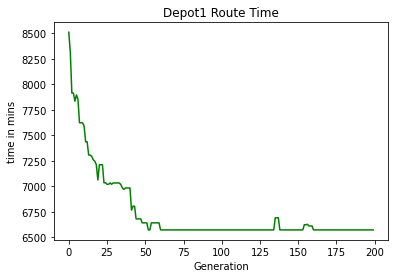

In [ ]:
fig=plt.figure(0)   # Figure representing correlation between number of generation and route-time
plt.title('Depot1 Route Time')
plt.plot(generationScores, 'g')
plt.ylabel('time in mins')
plt.xlabel('Generation')
plt.show(block=True)

**Viewing first depot's best candidate lorries routes :**

(this output will be used to create the json solution file)

In [ ]:
depot1 = depot(523,bestCandidate,2,2,1)
depot1.divide_customers()
depot1.assign_routes()
print('depot 1 delivery time:',depot1.time(),'\n')
depot1.view_routes()

depot 1 delivery time: 6572.361168805695 



([[[523, 5],
   [569.0, 49637.7167, 6144.03747, 0.13],
   [393.0, 49615.3975, 6135.9063, 1.12],
   [378.0, 49582.3846, 6184.13184, 0.54],
   [8.0, 49581.1158, 6252.70212, 0.19999999999999996],
   [94.0, 49462.6291, 6379.60707, 1.52],
   [523, 1.4899999999999998]],
  [[523, 5],
   [332.0, 49566.6101, 6095.53258, 0.79],
   [172.0, 49564.6529, 6141.57186, 0.91],
   [136.0, 49486.3938, 6128.89089, 0.33999999999999997],
   [276.0, 49470.8708, 6194.49647, 0.9299999999999999],
   [70.0, 49508.074, 6197.77764, 1.46],
   [523, 0.5700000000000003]]],
 [[[523, 12],
   [391.0, 49456.0671, 6121.2488299999995, 1.0],
   [225.0, 49576.420999999995, 6230.83363, 0.64],
   [183.0, 49583.3124, 6248.74238, 0.3999999999999999],
   [612.0, 49472.439000000006, 6339.2092299999995, 0.79],
   [27.0, 49473.734000000004, 6300.01926, 1.02],
   [523, 8.149999999999999]],
  [[523, 12],
   [29.0, 49506.5328, 6110.65568, 0.54],
   [86.0, 49556.8574, 6095.31102, 1.03],
   [44.0, 49612.5747, 6098.26347, 0.71],
   [603.0,

**Depot 2 :**

In [ ]:
bestCandidate2, generationScores2, generationCount2 = Genetic_Algorithm(200,12,124,depot2_customers_list,1,3,1)

Gen 1: 12730.0550004679
Gen 2: 12343.355715014179
Gen 3: 12240.524164211754
Gen 4: 11809.622596616873
Gen 5: 11912.885399806792
Gen 6: 11912.885399806792
Gen 7: 11909.12563769281
Gen 8: 11437.032660311495
Gen 9: 11643.235313202804
Gen 10: 11407.767701899325
Gen 11: 11207.782149546256
Gen 12: 11142.645448935427
Gen 13: 10867.112394091035
Gen 14: 10867.112394091035
Gen 15: 10527.355702622359
Gen 16: 10527.355702622359
Gen 17: 10406.706762932034
Gen 18: 10360.105306372383
Gen 19: 10214.625837277794
Gen 20: 9867.606896038093
Gen 21: 9867.606896038093
Gen 22: 9824.666177601188
Gen 23: 9824.666177601188
Gen 24: 9797.601477606619
Gen 25: 9612.658259679083
Gen 26: 9612.658259679083
Gen 27: 9602.39600538907
Gen 28: 9602.39600538907
Gen 29: 9602.39600538907
Gen 30: 9602.39600538907
Gen 31: 9429.127783767677
Gen 32: 9429.127783767677
Gen 33: 9049.096767913847
Gen 34: 9049.096767913847
Gen 35: 9049.096767913847
Gen 36: 9049.096767913847
Gen 37: 9049.096767913847
Gen 38: 9049.096767913847
Gen 39: 9

In [ ]:
print(bestCandidate2)
pprint(generationScores2[-1])

[[175.0, 49773.2855, 5760.7386799999995, 1.63], [400.0, 49760.102999999996, 5711.86592, 0.19], [474.0, 49429.6325, 5995.05802, 0.3999999999999999], [543.0, 49452.122, 6038.00431, 0.54], [520.0, 49550.1093, 5947.63035, 0.44], [270.0, 49592.3543, 6019.43547, 0.21999999999999997], [78.0, 49618.9849, 5918.07477, 0.63], [455.0, 49564.9352, 5899.65019, 0.3], [294.0, 49527.433, 5888.8498899999995, 0.81], [100.0, 49531.4131, 5991.77185, 1.02], [205.0, 49683.6347, 5912.95878, 0.9099999999999999], [180.0, 49611.6185, 6025.8333600000005, 0.76], [190.0, 49454.7742, 5915.3612, 0.3600000000000001], [135.0, 49487.768, 5826.92072, 1.33], [144.0, 49494.8158, 5885.8916899999995, 0.45999999999999996], [160.0, 49773.7549, 5836.2712200000005, 0.91], [431.0, 49619.3249, 5937.61395, 0.39], [103.0, 49623.3345, 5927.494189999999, 0.43999999999999995], [22.0, 49468.4322, 5890.39671, 1.68], [497.0, 49467.9755, 5971.33048, 0.98], [566.0, 49805.5603, 5786.1247, 0.26], [374.0, 49762.7238, 5771.69863, 0.5], [202.0, 

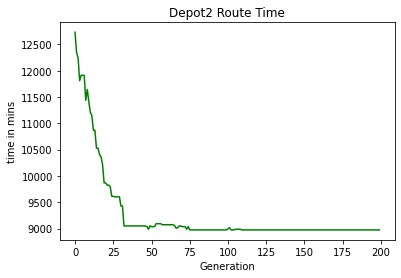

In [ ]:
fig=plt.figure(0)
plt.title('Depot2 Route Time')
plt.plot(generationScores2, 'g')
plt.ylabel('time in mins')
plt.xlabel('Generation')
plt.show(block=True)

**Viewing second depot's best candidate lorries routes :**

(this output will be used to create the json solution file)

In [ ]:
depot2 = depot(124,bestCandidate2,1,3,1)
depot2.divide_customers()
depot2.assign_routes()
print('depot 2 delivery time:',depot2.time(),'\n')
depot2.view_routes()

depot 2 delivery time: 8973.641573413908 



([[[124, 5],
   [175.0, 49773.2855, 5760.7386799999995, 1.63],
   [400.0, 49760.102999999996, 5711.86592, 0.19],
   [474.0, 49429.6325, 5995.05802, 0.3999999999999999],
   [543.0, 49452.122, 6038.00431, 0.54],
   [520.0, 49550.1093, 5947.63035, 0.44],
   [373, 1.8000000000000003]]],
 [[[124, 12],
   [270.0, 49592.3543, 6019.43547, 0.21999999999999997],
   [78.0, 49618.9849, 5918.07477, 0.63],
   [455.0, 49564.9352, 5899.65019, 0.3],
   [294.0, 49527.433, 5888.8498899999995, 0.81],
   [100.0, 49531.4131, 5991.77185, 1.02],
   [373, 9.019999999999998]],
  [[124, 12],
   [205.0, 49683.6347, 5912.95878, 0.9099999999999999],
   [180.0, 49611.6185, 6025.8333600000005, 0.76],
   [190.0, 49454.7742, 5915.3612, 0.3600000000000001],
   [135.0, 49487.768, 5826.92072, 1.33],
   [144.0, 49494.8158, 5885.8916899999995, 0.45999999999999996],
   [373, 8.18]],
  [[124, 12],
   [160.0, 49773.7549, 5836.2712200000005, 0.91],
   [431.0, 49619.3249, 5937.61395, 0.39],
   [103.0, 49623.3345, 5927.4941899999

**Depot 3 :**

In [ ]:
bestCandidate3, generationScores3, generationCount3 = Genetic_Algorithm(200,12,373,depot3_customers_list,2,2,1)

Gen 1: 12720.39274604237
Gen 2: 12512.537979114471
Gen 3: 12276.404294344915
Gen 4: 12066.912453530977
Gen 5: 12066.912453530977
Gen 6: 11624.682855176952
Gen 7: 11757.056931484436
Gen 8: 11451.51679132195
Gen 9: 11451.51679132195
Gen 10: 11298.910906629313
Gen 11: 11320.748215305068
Gen 12: 11391.065203136019
Gen 13: 11301.289958288718
Gen 14: 10998.828377465297
Gen 15: 10890.474194788187
Gen 16: 10890.474194788187
Gen 17: 10935.15681817487
Gen 18: 10805.258884186103
Gen 19: 10719.289372265739
Gen 20: 10719.289372265739
Gen 21: 10779.740960451669
Gen 22: 10779.740960451669
Gen 23: 10779.740960451669
Gen 24: 10535.622838172156
Gen 25: 10535.622838172156
Gen 26: 10466.638658891667
Gen 27: 10268.276271829793
Gen 28: 10303.880982684488
Gen 29: 10303.880982684488
Gen 30: 10303.880982684488
Gen 31: 10257.633767806714
Gen 32: 10257.633767806714
Gen 33: 10170.208966617902
Gen 34: 10115.388689880238
Gen 35: 10115.388689880238
Gen 36: 10115.388689880238
Gen 37: 10115.388689880238
Gen 38: 10115.

In [ ]:
print(bestCandidate3)
pprint(generationScores3[-1])

[[507.0, 49905.7775, 5857.35795, 1.15], [260.0, 49888.6731, 5884.27709, 1.62], [449.0, 49846.1774, 5828.86348, 1.74], [633.0, 49886.3968, 5905.60106, 0.18000000000000005], [204.0, 49925.2499, 5875.48563, 0.69], [206.0, 49894.4183, 5978.63717, 0.88], [408.0, 50045.3255, 5898.48996, 0.28], [118.0, 50050.1425, 5999.14981, 0.71], [177.0, 50067.2591, 6024.40434, 1.23], [169.0, 49950.136, 6000.69247, 1.4], [130.0, 49827.1538, 5760.9726, 1.19], [63.0, 49861.6653, 5777.6355, 0.47], [539.0, 49854.9923, 5852.38872, 0.28, 10.34, 10.34], [220.0, 49825.7175, 5892.08591, 0.61], [542.0, 49899.045999999995, 5928.82173, 0.47], [147.0, 49871.2247, 5989.1004, 0.8500000000000001], [372.0, 49946.2817, 6037.0994200000005, 1.75], [324.0, 50025.3426, 6076.41049, 0.42000000000000004], [606.0, 50128.1002, 6070.2134, 1.44], [362.0, 50111.7986, 6010.0457, 0.75], [476.0, 49837.1988, 5910.959870000001, 0.31000000000000005], [254.0, 49907.0144, 5980.37904, 1.28], [36.0, 49931.6835, 5935.73822, 0.81], [14.0, 49927.66

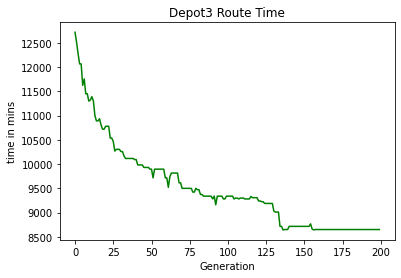

In [ ]:
fig=plt.figure(0)
plt.title('Depot3 Route Time')
plt.plot(generationScores3, 'g')
plt.ylabel('time in mins')
plt.xlabel('Generation')
plt.show(block=True)

**Viewing third depot's best candidate lorries routes :**

(this output will be used to create the json solution file)

In [ ]:
depot3 = depot(373,bestCandidate3,2,2,1)
depot3.divide_customers()
depot3.assign_routes()
depot3.view_routes()

([[[373, 5],
   [507.0, 49905.7775, 5857.35795, 1.15],
   [260.0, 49888.6731, 5884.27709, 1.62],
   [449.0, 49846.1774, 5828.86348, 1.74],
   [633.0, 49886.3968, 5905.60106, 0.18000000000000005],
   [124, 0.6899999999999995],
   [204.0, 49925.2499, 5875.48563, 0.69],
   [124]],
  [[373, 5],
   [206.0, 49894.4183, 5978.63717, 0.88],
   [408.0, 50045.3255, 5898.48996, 0.28],
   [118.0, 50050.1425, 5999.14981, 0.71],
   [177.0, 50067.2591, 6024.40434, 1.23],
   [169.0, 49950.136, 6000.69247, 1.4],
   [124, 0.5]]],
 [[[373, 12],
   [130.0, 49827.1538, 5760.9726, 1.19],
   [63.0, 49861.6653, 5777.6355, 0.47],
   [539.0, 49854.9923, 5852.38872, 0.28, 10.34, 10.34, 10.34],
   [220.0, 49825.7175, 5892.08591, 0.61],
   [542.0, 49899.045999999995, 5928.82173, 0.47],
   [124, 9.26]],
  [[373, 12],
   [147.0, 49871.2247, 5989.1004, 0.8500000000000001],
   [372.0, 49946.2817, 6037.0994200000005, 1.75],
   [324.0, 50025.3426, 6076.41049, 0.42000000000000004],
   [606.0, 50128.1002, 6070.2134, 1.44],

**Depot 4 :**

In [ ]:
bestCandidate4, generationScores4, generationCount4 = Genetic_Algorithm(200,12,167,depot4_customers_list,3,1,1)

Gen 1: 11508.383477893194
Gen 2: 11398.245708017024
Gen 3: 10413.200694452851
Gen 4: 10147.179124130838
Gen 5: 10234.361619005416
Gen 6: 9847.18664258669
Gen 7: 9419.075220765953
Gen 8: 9419.075220765953
Gen 9: 9034.08880889367
Gen 10: 9093.2476821741
Gen 11: 9093.2476821741
Gen 12: 9093.2476821741
Gen 13: 8856.349270015384
Gen 14: 8951.585091291534
Gen 15: 8890.72100303398
Gen 16: 8890.72100303398
Gen 17: 8840.881512280303
Gen 18: 8840.881512280303
Gen 19: 8840.881512280303
Gen 20: 8805.450308799675
Gen 21: 8805.450308799675
Gen 22: 8719.053588159888
Gen 23: 8755.610818046
Gen 24: 8669.214097406213
Gen 25: 8669.214097406213
Gen 26: 8668.953153038346
Gen 27: 8668.953153038346
Gen 28: 8668.953153038346
Gen 29: 8618.260809972875
Gen 30: 8618.260809972875
Gen 31: 8610.271314066817
Gen 32: 8618.260809972875
Gen 33: 8618.260809972875
Gen 34: 8665.742084616639
Gen 35: 8692.228050576443
Gen 36: 8665.742084616639
Gen 37: 8665.742084616639
Gen 38: 8665.742084616639
Gen 39: 8665.742084616639
Gen

In [ ]:
print(bestCandidate4)
pprint(generationScores4[-1])

[[380.0, 49835.477999999996, 6295.1675399999995, 0.15999999999999998], [5.0, 49712.0961, 6362.849, 0.09999999999999998], [255.0, 49608.419, 6298.8642, 0.16999999999999998], [585.0, 49588.9002, 6332.6017600000005, 1.41], [632.0, 49497.599, 6352.24825, 1.24], [584.0, 49813.5126, 6325.888129999999, 0.21999999999999997], [511.0, 49814.96400000001, 6311.28026, 0.24], [65.0, 49632.1341, 6462.64503, 0.72], [77.0, 49774.1937, 6511.04225, 1.47], [41.0, 49673.5864, 6466.53212, 1.03], [387.0, 49684.5838, 6432.4151600000005, 1.24], [308.0, 49753.8897, 6400.09523, 0.6799999999999999], [31.0, 49836.2564, 6243.34558, 0.56], [265.0, 49838.6846, 6231.86204, 0.48], [243.0, 49824.8895, 6232.94834, 0.6699999999999999], [398.0, 49707.0031, 6224.93523, 0.89], [146.0, 49672.917, 6287.68866, 1.45], [624.0, 49691.222, 6325.56722, 0.51], [534.0, 49705.2897, 6485.58412, 1.19], [113.0, 49716.5183, 6353.988579999999, 0.44999999999999996], [459.0, 49840.9974, 6184.2102700000005, 1.98], [437.0, 49834.7224, 6200.4891

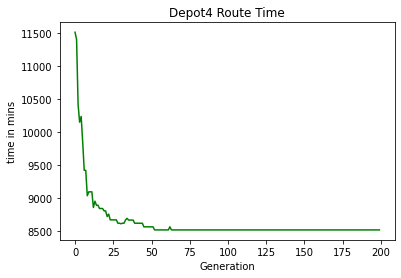

In [ ]:
fig=plt.figure(0)
plt.title('Depot4 Route Time')
plt.plot(generationScores4, 'g')
plt.ylabel('time in mins')
plt.xlabel('Generation')
plt.show(block=True)

**Viewing fourth depot's best candidate lorries routes :**

(this output will be used to create the json solution file)

In [ ]:
depot4 = depot(167,bestCandidate4,3,1,1)
depot4.divide_customers()
depot4.assign_routes()
print('depot 4 delivery time',depot4.time(),'\n')
depot4.view_routes()

depot 4 delivery time 8516.970596671588 



([[[167, 5],
   [380.0, 49835.477999999996, 6295.1675399999995, 0.15999999999999998],
   [5.0, 49712.0961, 6362.849, 0.09999999999999998],
   [255.0, 49608.419, 6298.8642, 0.16999999999999998],
   [585.0, 49588.9002, 6332.6017600000005, 1.41],
   [632.0, 49497.599, 6352.24825, 1.24],
   [523, 1.9200000000000002]],
  [[167, 5],
   [584.0, 49813.5126, 6325.888129999999, 0.21999999999999997],
   [511.0, 49814.96400000001, 6311.28026, 0.24],
   [65.0, 49632.1341, 6462.64503, 0.72],
   [77.0, 49774.1937, 6511.04225, 1.47],
   [41.0, 49673.5864, 6466.53212, 1.03],
   [127, 1.3200000000000005]],
  [[167, 5],
   [387.0, 49684.5838, 6432.4151600000005, 1.24],
   [308.0, 49753.8897, 6400.09523, 0.6799999999999999],
   [31.0, 49836.2564, 6243.34558, 0.56],
   [265.0, 49838.6846, 6231.86204, 0.48],
   [243.0, 49824.8895, 6232.94834, 0.6699999999999999],
   [127, 1.37]]],
 [[[167, 12],
   [398.0, 49707.0031, 6224.93523, 0.89],
   [146.0, 49672.917, 6287.68866, 1.45],
   [624.0, 49691.222, 6325.5672

**Depot 5 :**

In [ ]:
bestCandidate5, generationScores5, generationCount5 = Genetic_Algorithm(200,12,127,depot5_customers_list,2,2,1)

Gen 1: 11216.884514464156
Gen 2: 11196.586385392913
Gen 3: 11341.516020226514
Gen 4: 11338.435476374987
Gen 5: 11341.516020226514
Gen 6: 11145.733402791595
Gen 7: 10702.639733854452
Gen 8: 10363.701042808829
Gen 9: 9965.555754822977
Gen 10: 9877.743574714788
Gen 11: 9877.743574714788
Gen 12: 9965.555754822977
Gen 13: 9965.555754822977
Gen 14: 9965.555754822977
Gen 15: 9761.353516822513
Gen 16: 9761.353516822513
Gen 17: 9761.353516822513
Gen 18: 9681.915162157442
Gen 19: 9357.741905068506
Gen 20: 9357.741905068506
Gen 21: 9341.382957164324
Gen 22: 9341.382957164324
Gen 23: 9197.177243786658
Gen 24: 9197.177243786658
Gen 25: 8908.805736085902
Gen 26: 8892.446788181722
Gen 27: 8892.446788181722
Gen 28: 8887.857403899598
Gen 29: 8757.511567798012
Gen 30: 8757.511567798012
Gen 31: 8757.511567798012
Gen 32: 8757.511567798012
Gen 33: 8757.511567798012
Gen 34: 8745.529788144995
Gen 35: 8745.529788144995
Gen 36: 8745.529788144995
Gen 37: 8745.529788144995
Gen 38: 8745.529788144995
Gen 39: 8745.

In [ ]:
print(bestCandidate5)
pprint(generationScores5[-1])

[[377.0, 49651.4758, 6057.461829999999, 0.95], [171.0, 49866.4031, 6020.648029999999, 1.3199999999999998], [245.0, 49815.6403, 5853.41511, 0.15000000000000002], [446.0, 49765.5214, 5888.0572, 0.94], [418.0, 49805.6315, 5911.09094, 0.32999999999999996], [13.0, 49609.499, 6060.54337, 0.19999999999999996], [337.0, 49631.7836, 6066.33814, 0.44999999999999996], [397.0, 49842.8132, 5990.08815, 0.7], [210.0, 49887.7803, 6084.00545, 0.47], [621.0, 49712.1636, 6153.84308, 0.24], [73.0, 49919.8675, 6165.40194, 0.22999999999999998], [80.0, 49786.3979, 6150.2282700000005, 0.22999999999999998], [598.0, 49764.4067, 6108.50137, 0.97], [453.0, 49681.1322, 6163.7682, 0.61], [271.0, 49668.6461, 6143.0441, 0.9], [547.0, 49686.5358, 6004.331999999999, 0.95], [200.0, 49637.3721, 6023.89652, 0.27], [528.0, 49809.2082, 6148.78966, 0.12], [32.0, 49916.416, 6137.33568, 0.92], [64.0, 49853.9758, 6142.6863, 0.96], [274.0, 49684.7599, 6101.44771, 0.16999999999999993], [214.0, 49803.8286, 6056.41074, 1.60999999999

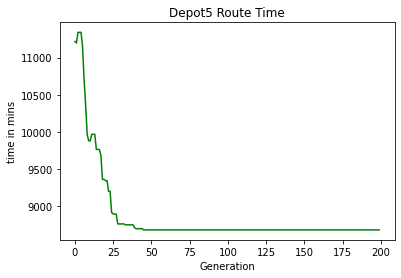

In [ ]:
fig=plt.figure(0)
plt.title('Depot5 Route Time')
plt.plot(generationScores5, 'g')
plt.ylabel('time in mins')
plt.xlabel('Generation')
plt.show(block=True)

**Viewing fifth depot's best candidate lorries routes :**

(this output will be used to create the json solution file)

In [ ]:
depot5 = depot(127,bestCandidate5,2,2,1)
depot5.divide_customers()
depot5.assign_routes()
print('depot 5 delivery time:',depot5.time(),'\n')
depot5.view_routes()

depot 5 delivery time: 8676.746580970057 



([[[127, 5],
   [377.0, 49651.4758, 6057.461829999999, 0.95],
   [171.0, 49866.4031, 6020.648029999999, 1.3199999999999998],
   [245.0, 49815.6403, 5853.41511, 0.15000000000000002],
   [446.0, 49765.5214, 5888.0572, 0.94],
   [418.0, 49805.6315, 5911.09094, 0.32999999999999996],
   [124, 1.31]],
  [[127, 5],
   [13.0, 49609.499, 6060.54337, 0.19999999999999996],
   [337.0, 49631.7836, 6066.33814, 0.44999999999999996],
   [397.0, 49842.8132, 5990.08815, 0.7],
   [210.0, 49887.7803, 6084.00545, 0.47],
   [621.0, 49712.1636, 6153.84308, 0.24],
   [167, 2.9399999999999995]]],
 [[[127, 12],
   [73.0, 49919.8675, 6165.40194, 0.22999999999999998],
   [80.0, 49786.3979, 6150.2282700000005, 0.22999999999999998],
   [598.0, 49764.4067, 6108.50137, 0.97],
   [453.0, 49681.1322, 6163.7682, 0.61],
   [271.0, 49668.6461, 6143.0441, 0.9],
   [167, 9.059999999999999]],
  [[127, 12],
   [547.0, 49686.5358, 6004.331999999999, 0.95],
   [200.0, 49637.3721, 6023.89652, 0.27],
   [528.0, 49809.2082, 6148.7

**Thus, if all lorries are delivering gas to customers simultaneously, the overall delivery time will be the greatest minimum depot delivery time obtained above.**

**Discuss Genetic Algorithm Results :**

It is quite clear that delivery time for each depot is reducing while the increasing of the Genetic Algorithm generations.

From the above results, it seems that the first depot has the lowest delivery time and that probably due to short distances between customer locations assigned to this depot (check blue points in clustering chart).

The results of Genetic Algorithm generations are sometimes convergent. But due to crossover and mutation functions, results convergence  is being solved.

Too much increasing of crossover and mutation rates will not be a good idea as the generations results will get convergent in a specific range and will not find minimum solutions. Thus, setting the correct crossover and mutation rates could be the most significant and challenging issue in Genetic Algorithm.

Some generations results are higher than the previous ones, and this is probably due to mutation and crossover. however, results are restored in  next generations.

Increasing of population size will help to start the optimization with better results. However, this will increase the computational complexity as well.

The more generations number, the better results obtained.

As disscussed before, because we divided the delivery problem equally between the depots, it will be rare for a lorry to run out of gas, and if that happend it would be for a small lorry. And from the results above we can see that no lorry had to refill gas. Hence, we know that the algorithm chose the routes with the best time cost.

**Task 2: Maximaizing Cost efficiency with Particle Swarm Optimization Algorithm (PSO)**

In [ ]:
def depot_cost_efficiency(depot_id,customers_list,sml_lorry_no,med_lorry_no,larg_lorry_no):

   d = depot(depot_id,customers_list,sml_lorry_no,med_lorry_no,larg_lorry_no)
   d.divide_customers()
   d.assign_routes()
   cost_efficiency = d.cost_efficiency()

   return cost_efficiency

In [ ]:
class Particle:

    def __init__(self,depot_id,customers_list,sml_lorry_no,med_lorry_no,larg_lorry_no ):

        self.depot_id = depot_id
        self.customers_list = customers_list
        self.sml_lorry_no = sml_lorry_no
        self.med_lorry_no = med_lorry_no
        self.larg_lorry_no = larg_lorry_no

        self.pbest = customers_list

        self.current_cost = self.depot_cost_efficiency()

        self.pbest_cost = self.depot_cost_efficiency()
        self.velocity = []


    def clear_velocity(self):
        self.velocity.clear()

    def update_costs_and_pbest(self):
        self.current_cost = self.depot_cost_efficiency()
        if self.current_cost < self.pbest_cost:
            self.pbest = self.customers_list
            self.pbest_cost = self.current_cost

    def depot_cost_efficiency(self):
        return depot_cost_efficiency(self.depot_id, self.customers_list, self.sml_lorry_no, self.med_lorry_no, self.larg_lorry_no)

In [ ]:
class PSO:

    def __init__(self ,depot_id, iterations, population_size, gbest_probability= None, pbest_probability= None,customers_list = None ,sml_lorry_no= None
                 ,med_lorry_no = None ,larg_lorry_no = None):

        self.depot_id = depot_id
        self.customers_list = customers_list
        self.sml_lorry_no = sml_lorry_no
        self.med_lorry_no = med_lorry_no
        self.larg_lorry_no = larg_lorry_no

        self.gbest = None
        self.gcost_iter = []
        self.iterations = iterations
        self.population_size = population_size
        self.particles = []
        self.gbest_probability = gbest_probability
        self.pbest_probability = pbest_probability

        solutions = self.initial_population()

        # Set up a list of particle objects for each solution (customer_list) in the initial population:
        self.particles = [Particle(depot_id=self.depot_id ,customers_list = solution,sml_lorry_no=self.sml_lorry_no,med_lorry_no=self.med_lorry_no,
                                   larg_lorry_no= self.larg_lorry_no) for solution in solutions]

    def random_route(self):
        return random.sample(self.customers_list, len(self.customers_list))  # Construct a completely random customer_list

    def initial_population(self):

        random_population = [self.random_route() for _ in range(self.population_size - 1)]

        return random_population


    def run(self):

        self.gbest = min(self.particles, key=lambda p: p.pbest_cost) # first global best

        print(f"initial cost efficiency is {self.gbest.pbest_cost}")

        plt.draw()
        for t in range(1,self.iterations):

            self.gbest = min(self.particles, key=lambda p: p.pbest_cost) # global best for each iteration

            if t % 100 == 0:    # Draw the graph of cost efficiency against generation every 100 iterations

                fig=plt.figure()
                plt.plot(self.gcost_iter, 'g')
                plt.ylabel('Cost Efficiency')
                plt.xlabel('Generation')

                fig = plt.figure()
                fig.suptitle('pso iter')

                plt.draw()
                plt.pause(0.01)

            self.gcost_iter.append(self.gbest.pbest_cost)  # Add best cost to list

            for particle in self.particles:
                particle.clear_velocity()
                temp_velocity = []
                gbest = self.gbest.pbest[:]
                new_customers_list = particle.customers_list[:]


                # Set up changes based on the particles personal best position/customer_list
                for i in range(len(self.customers_list)):
                    if new_customers_list[i] != particle.pbest[i]:
                        swap = (i, particle.pbest.index(new_customers_list[i]), self.pbest_probability)
                        temp_velocity.append(swap)
                        new_customers_list[swap[0]], new_customers_list[swap[1]] = \
                            new_customers_list[swap[1]], new_customers_list[swap[0]]

                # Set up changes based on the swarms global best position/customer_list
                for i in range(len(self.customers_list)):
                    if new_customers_list[i] != gbest[i]:
                        swap = (i, gbest.index(new_customers_list[i]), self.gbest_probability)
                        temp_velocity.append(swap)
                        gbest[swap[0]], gbest[swap[1]] = gbest[swap[1]], gbest[swap[0]]

                # temp_velocity is a list of swaps to be applied to the new customer_list
                particle.velocity = temp_velocity


                # Apply the velocity changes to new customer_list
                # Velocity change means swapping the order of some of the customers
                for swap in temp_velocity:
                    if random.random() <= swap[2]:
                        new_customers_list[swap[0]], new_customers_list[swap[1]] = \
                            new_customers_list[swap[1]], new_customers_list[swap[0]]

                # Update the particle
                particle.customers_list = new_customers_list
                particle.update_costs_and_pbest()

        #return self.gbest.pbest

**Similar to previous task we will apply PSO for each depot (sub-problem) and sum the results at the end :**

**Depot 1 :**

In [ ]:
depot1_best_CE = PSO(523,iterations=1200, population_size=10, pbest_probability=0.9, gbest_probability=0.02, customers_list =depot1_customers_list,sml_lorry_no=2,
med_lorry_no=2,larg_lorry_no=1)

initial cost efficiency is -0.00186555869436806


<Figure size 432x288 with 0 Axes>

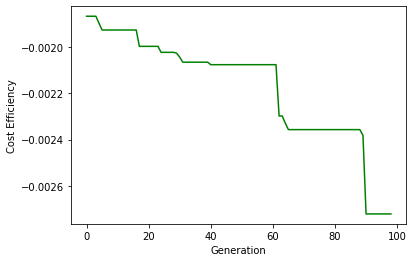

<Figure size 432x288 with 0 Axes>

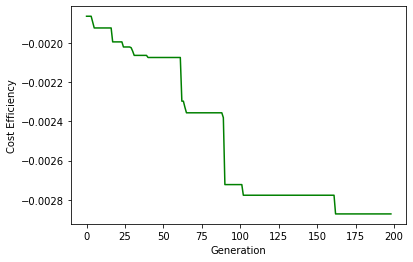

<Figure size 432x288 with 0 Axes>

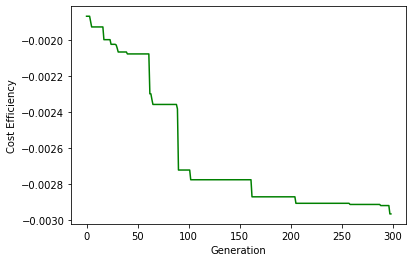

<Figure size 432x288 with 0 Axes>

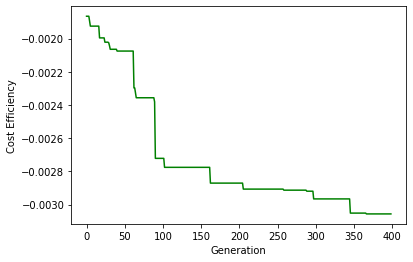

<Figure size 432x288 with 0 Axes>

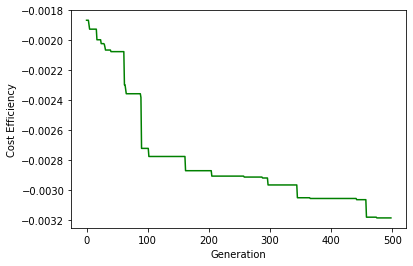

<Figure size 432x288 with 0 Axes>

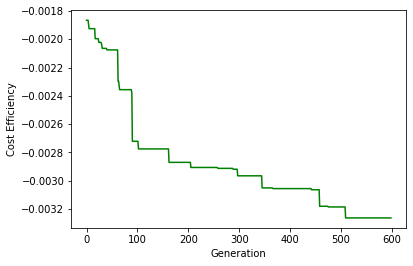

<Figure size 432x288 with 0 Axes>

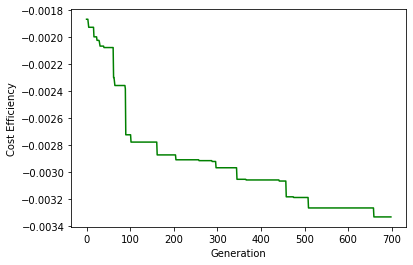

<Figure size 432x288 with 0 Axes>

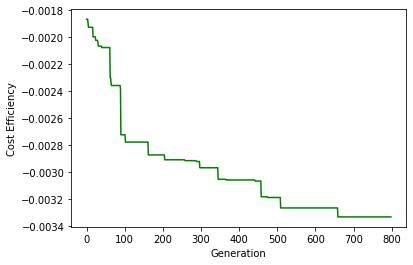

<Figure size 432x288 with 0 Axes>

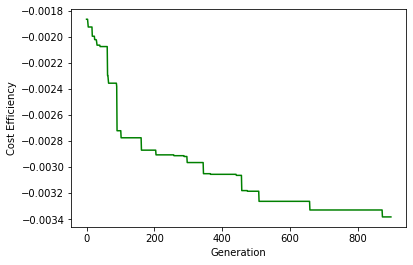

<Figure size 432x288 with 0 Axes>

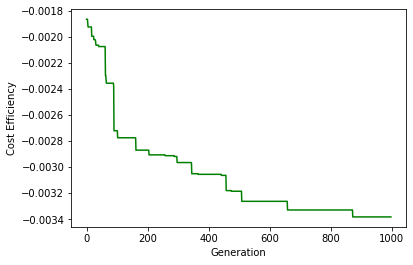

<Figure size 432x288 with 0 Axes>

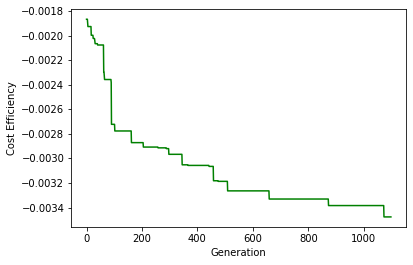

<Figure size 432x288 with 0 Axes>

[[27.0, 49473.734000000004, 6300.01926, 1.02],
 [94.0, 49462.6291, 6379.60707, 1.52],
 [612.0, 49472.439000000006, 6339.2092299999995, 0.79],
 [519.0, 49485.3773, 6246.252170000001, 0.21000000000000002],
 [235.0, 49536.7876, 6266.35653, 0.36],
 [276.0, 49470.8708, 6194.49647, 0.9299999999999999],
 [391.0, 49456.0671, 6121.2488299999995, 1.0],
 [70.0, 49508.074, 6197.77764, 1.46],
 [491.0, 49475.3653, 6296.5842299999995, 0.33999999999999997],
 [257.0, 49530.9372, 6265.39061, 0.19999999999999996],
 [172.0, 49564.6529, 6141.57186, 0.91],
 [44.0, 49612.5747, 6098.26347, 0.71],
 [389.0, 49605.4676, 6132.0014200000005, 0.07],
 [332.0, 49566.6101, 6095.53258, 0.79],
 [531.0, 49524.3904, 6137.0226, 0.10999999999999999],
 [86.0, 49556.8574, 6095.31102, 1.03],
 [136.0, 49486.3938, 6128.89089, 0.33999999999999997],
 [378.0, 49582.3846, 6184.13184, 0.54],
 [29.0, 49506.5328, 6110.65568, 0.54],
 [183.0, 49583.3124, 6248.74238, 0.3999999999999999],
 [225.0, 49576.420999999995, 6230.83363, 0.64],
 [8

In [ ]:
depot1_best_CE.run()

In [ ]:
print(f'depot1 best cost efficiency: {depot1_best_CE.gbest.pbest_cost}\t| gbest: {depot1_best_CE.gbest.pbest}')

depot1 best cost efficiency: -0.003476320830158665	| gbest: [[27.0, 49473.734000000004, 6300.01926, 1.02], [94.0, 49462.6291, 6379.60707, 1.52], [612.0, 49472.439000000006, 6339.2092299999995, 0.79], [519.0, 49485.3773, 6246.252170000001, 0.21000000000000002], [235.0, 49536.7876, 6266.35653, 0.36], [276.0, 49470.8708, 6194.49647, 0.9299999999999999], [391.0, 49456.0671, 6121.2488299999995, 1.0], [70.0, 49508.074, 6197.77764, 1.46], [491.0, 49475.3653, 6296.5842299999995, 0.33999999999999997], [257.0, 49530.9372, 6265.39061, 0.19999999999999996], [172.0, 49564.6529, 6141.57186, 0.91], [44.0, 49612.5747, 6098.26347, 0.71], [389.0, 49605.4676, 6132.0014200000005, 0.07], [332.0, 49566.6101, 6095.53258, 0.79], [531.0, 49524.3904, 6137.0226, 0.10999999999999999], [86.0, 49556.8574, 6095.31102, 1.03], [136.0, 49486.3938, 6128.89089, 0.33999999999999997], [378.0, 49582.3846, 6184.13184, 0.54], [29.0, 49506.5328, 6110.65568, 0.54], [183.0, 49583.3124, 6248.74238, 0.3999999999999999], [225.0, 49

**Viewing first depot's best cost efficiency lorries routes :**

(this output will be used to create the json solution file)

In [ ]:
d1 = depot(523,depot1_best_CE.gbest.pbest,2,2,1)
d1.divide_customers()
d1.assign_routes()
print(d1.cost_efficiency(),'\n')
d1.view_routes()

-0.003476320830158665 



([[[523, 5],
   [27.0, 49473.734000000004, 6300.01926, 1.02],
   [94.0, 49462.6291, 6379.60707, 1.52],
   [612.0, 49472.439000000006, 6339.2092299999995, 0.79],
   [519.0, 49485.3773, 6246.252170000001, 0.21000000000000002],
   [235.0, 49536.7876, 6266.35653, 0.36],
   [523, 1.1]],
  [[523, 5],
   [276.0, 49470.8708, 6194.49647, 0.9299999999999999],
   [391.0, 49456.0671, 6121.2488299999995, 1.0],
   [70.0, 49508.074, 6197.77764, 1.46],
   [491.0, 49475.3653, 6296.5842299999995, 0.33999999999999997],
   [257.0, 49530.9372, 6265.39061, 0.19999999999999996],
   [523, 1.0700000000000005]]],
 [[[523, 12],
   [172.0, 49564.6529, 6141.57186, 0.91],
   [44.0, 49612.5747, 6098.26347, 0.71],
   [389.0, 49605.4676, 6132.0014200000005, 0.07],
   [332.0, 49566.6101, 6095.53258, 0.79],
   [531.0, 49524.3904, 6137.0226, 0.10999999999999999],
   [373, 9.41]],
  [[523, 12],
   [86.0, 49556.8574, 6095.31102, 1.03],
   [136.0, 49486.3938, 6128.89089, 0.33999999999999997],
   [378.0, 49582.3846, 6184.131

**Depot 2 :**

In [ ]:
depot2_best_CE = PSO(124,iterations=1200, population_size=10, pbest_probability=0.9, gbest_probability=0.02, customers_list = depot2_customers_list,sml_lorry_no=1,
med_lorry_no=3,larg_lorry_no=1)

initial cost efficiency is -0.0009175714275946893


<Figure size 432x288 with 0 Axes>

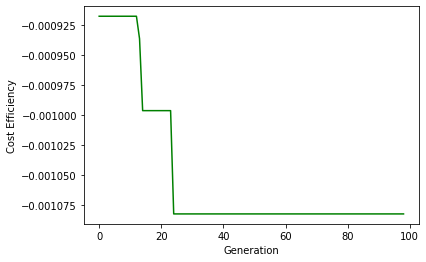

<Figure size 432x288 with 0 Axes>

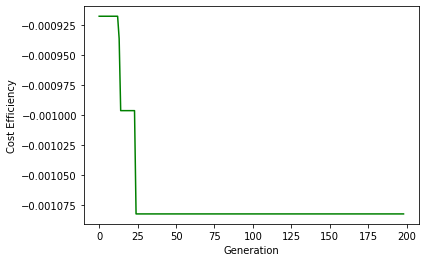

<Figure size 432x288 with 0 Axes>

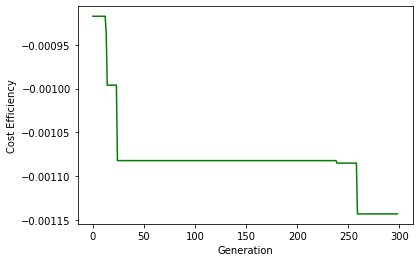

<Figure size 432x288 with 0 Axes>

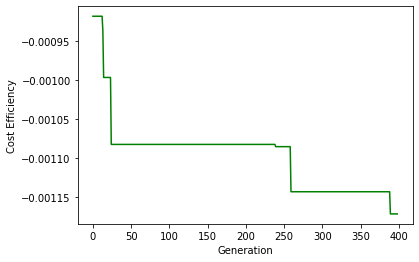

<Figure size 432x288 with 0 Axes>

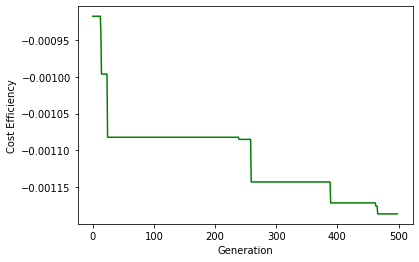

<Figure size 432x288 with 0 Axes>

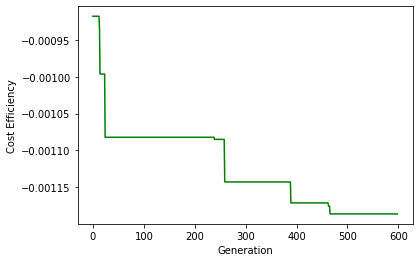

<Figure size 432x288 with 0 Axes>

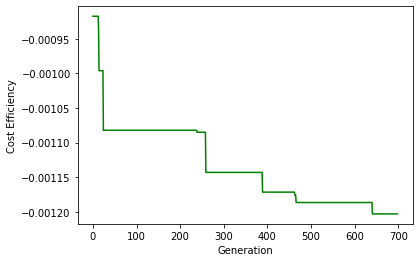

<Figure size 432x288 with 0 Axes>

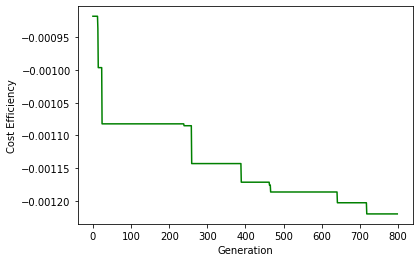

<Figure size 432x288 with 0 Axes>

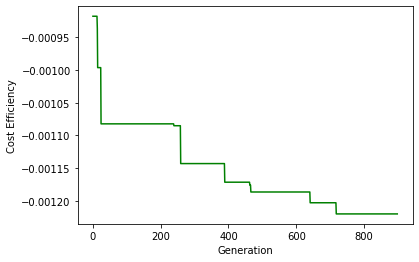

<Figure size 432x288 with 0 Axes>

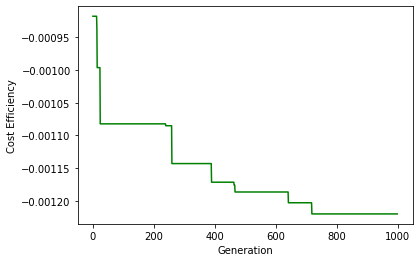

<Figure size 432x288 with 0 Axes>

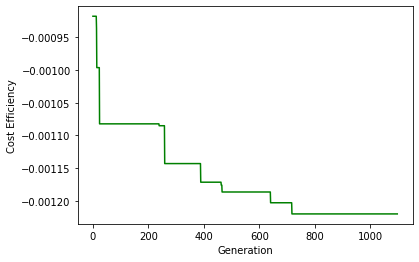

<Figure size 432x288 with 0 Axes>

In [ ]:
depot2_best_CE.run()

In [ ]:
print(f'depot2 cost efficiency: {depot2_best_CE.gbest.pbest_cost}\t| gbest: {depot2_best_CE.gbest.pbest}')

depot2 cost efficiency: -0.001254224160775054	| gbest: [[374.0, 49762.7238, 5771.69863, 0.5], [175.0, 49773.2855, 5760.7386799999995, 1.63], [216.0, 49703.0451, 5826.7101299999995, 0.27], [294.0, 49527.433, 5888.8498899999995, 0.81], [22.0, 49468.4322, 5890.39671, 1.68], [180.0, 49611.6185, 6025.8333600000005, 0.76], [431.0, 49619.3249, 5937.61395, 0.39], [103.0, 49623.3345, 5927.494189999999, 0.43999999999999995], [543.0, 49452.122, 6038.00431, 0.54], [270.0, 49592.3543, 6019.43547, 0.21999999999999997], [364.0, 49665.2811, 5912.970060000001, 0.89], [190.0, 49454.7742, 5915.3612, 0.3600000000000001], [497.0, 49467.9755, 5971.33048, 0.98], [144.0, 49494.8158, 5885.8916899999995, 0.45999999999999996], [135.0, 49487.768, 5826.92072, 1.33], [400.0, 49760.102999999996, 5711.86592, 0.19], [202.0, 49749.4909, 5835.5949200000005, 0.17000000000000004], [520.0, 49550.1093, 5947.63035, 0.44], [78.0, 49618.9849, 5918.07477, 0.63], [205.0, 49683.6347, 5912.95878, 0.9099999999999999], [474.0, 49429

**Viewing second depot's best cost efficiency lorries routes :**

(this output will be used to create the json solution file)

In [ ]:
d2 = depot(124,depot2_best_CE.gbest.pbest,1,3,1)
d2.divide_customers()
d2.assign_routes()
print(d2.cost_efficiency(),'\n')
d2.view_routes()

-0.001254224160775054 



([[[124, 5],
   [374.0, 49762.7238, 5771.69863, 0.5],
   [175.0, 49773.2855, 5760.7386799999995, 1.63],
   [216.0, 49703.0451, 5826.7101299999995, 0.27],
   [294.0, 49527.433, 5888.8498899999995, 0.81],
   [22.0, 49468.4322, 5890.39671, 1.68],
   [373, 0.1100000000000001]]],
 [[[124, 12],
   [180.0, 49611.6185, 6025.8333600000005, 0.76],
   [431.0, 49619.3249, 5937.61395, 0.39],
   [103.0, 49623.3345, 5927.494189999999, 0.43999999999999995],
   [543.0, 49452.122, 6038.00431, 0.54],
   [270.0, 49592.3543, 6019.43547, 0.21999999999999997],
   [373, 9.65]],
  [[124, 12],
   [364.0, 49665.2811, 5912.970060000001, 0.89],
   [190.0, 49454.7742, 5915.3612, 0.3600000000000001],
   [497.0, 49467.9755, 5971.33048, 0.98],
   [144.0, 49494.8158, 5885.8916899999995, 0.45999999999999996],
   [135.0, 49487.768, 5826.92072, 1.33],
   [373, 7.979999999999999]],
  [[124, 12],
   [400.0, 49760.102999999996, 5711.86592, 0.19],
   [202.0, 49749.4909, 5835.5949200000005, 0.17000000000000004],
   [520.0, 495

**Depot 3 :**

In [ ]:
depot3_best_CE = PSO(373,iterations=1200, population_size=10, pbest_probability=0.9, gbest_probability=0.02, customers_list = depot3_customers_list,sml_lorry_no=2,
med_lorry_no=2,larg_lorry_no=1)

initial cost efficiency is -0.0013933454063833998


<Figure size 432x288 with 0 Axes>

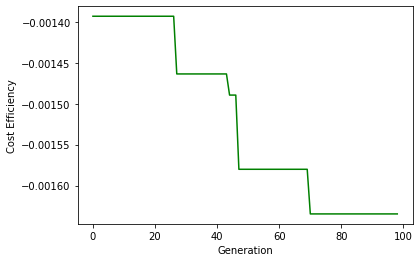

<Figure size 432x288 with 0 Axes>

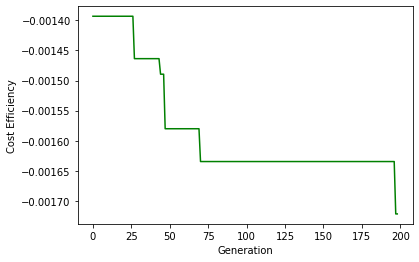

<Figure size 432x288 with 0 Axes>

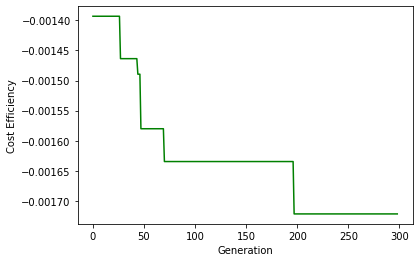

<Figure size 432x288 with 0 Axes>

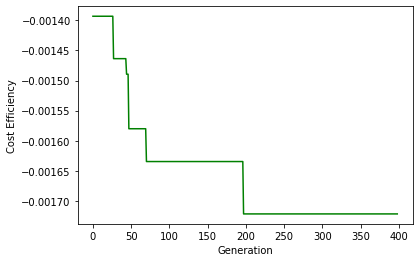

<Figure size 432x288 with 0 Axes>

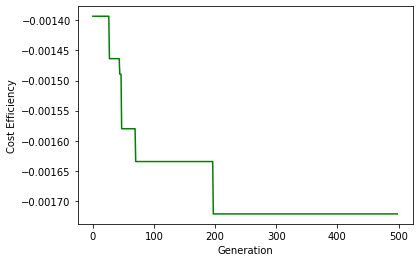

<Figure size 432x288 with 0 Axes>

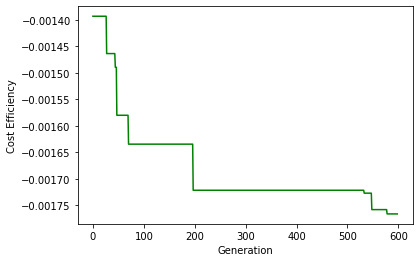

<Figure size 432x288 with 0 Axes>

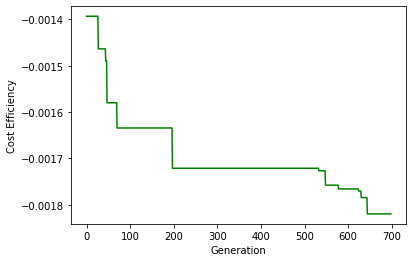

<Figure size 432x288 with 0 Axes>

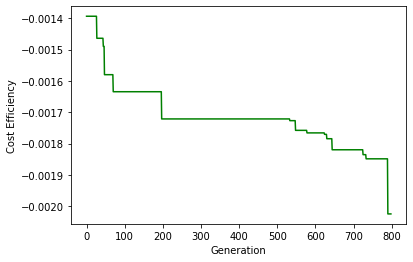

<Figure size 432x288 with 0 Axes>

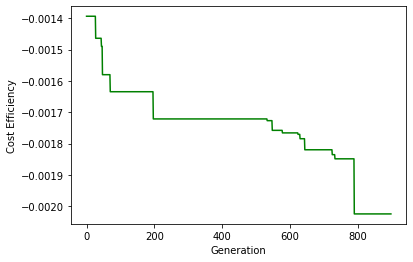

<Figure size 432x288 with 0 Axes>

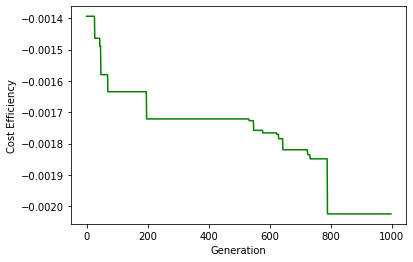

<Figure size 432x288 with 0 Axes>

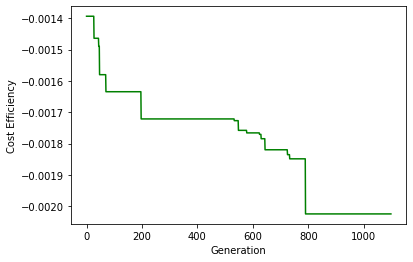

<Figure size 432x288 with 0 Axes>

In [ ]:
depot3_best_CE.run()

In [ ]:
print(f'depot3 cost efficiency: {depot3_best_CE.gbest.pbest_cost}\t| gbest: {depot3_best_CE.gbest.pbest}')

depot3 cost efficiency: -0.0021050988358471074	| gbest: [[220.0, 49825.7175, 5892.08591, 0.61], [254.0, 49907.0144, 5980.37904, 1.28], [206.0, 49894.4183, 5978.63717, 0.88], [372.0, 49946.2817, 6037.0994200000005, 1.75], [542.0, 49899.045999999995, 5928.82173, 0.47], [449.0, 49846.1774, 5828.86348, 1.74], [130.0, 49827.1538, 5760.9726, 1.19], [63.0, 49861.6653, 5777.6355, 0.47], [507.0, 49905.7775, 5857.35795, 1.15], [36.0, 49931.6835, 5935.73822, 0.81], [408.0, 50045.3255, 5898.48996, 0.28], [633.0, 49886.3968, 5905.60106, 0.18000000000000005], [476.0, 49837.1988, 5910.959870000001, 0.31000000000000005], [411.0, 49939.9823, 5870.53539, 0.99], [539.0, 49854.9923, 5852.38872, 0.28], [260.0, 49888.6731, 5884.27709, 1.62], [147.0, 49871.2247, 5989.1004, 0.8500000000000001], [606.0, 50128.1002, 6070.2134, 1.44], [324.0, 50025.3426, 6076.41049, 0.42000000000000004], [169.0, 49950.136, 6000.69247, 1.4], [14.0, 49927.6605, 5930.46156, 0.32999999999999996], [204.0, 49925.2499, 5875.48563, 0.69

**Viewing third depot's best cost efficiency lorries routes :**

(this output will be used to create the json solution file)

In [ ]:
d3 = depot(373,depot3_best_CE.gbest.pbest,2,2,1)
d3.divide_customers()
d3.assign_routes()
print(d3.cost_efficiency(),'\n')
d3.view_routes()

-0.0021050988358471074 



([[[373, 5],
   [220.0, 49825.7175, 5892.08591, 0.61],
   [254.0, 49907.0144, 5980.37904, 1.28],
   [206.0, 49894.4183, 5978.63717, 0.88],
   [372.0, 49946.2817, 6037.0994200000005, 1.75],
   [542.0, 49899.045999999995, 5928.82173, 0.47],
   [124, 0.009999999999999565]],
  [[373, 5],
   [449.0, 49846.1774, 5828.86348, 1.74],
   [130.0, 49827.1538, 5760.9726, 1.19],
   [63.0, 49861.6653, 5777.6355, 0.47],
   [507.0, 49905.7775, 5857.35795, 1.15],
   [124, 0.8100000000000005],
   [36.0, 49931.6835, 5935.73822, 0.81],
   [124]]],
 [[[373, 12],
   [408.0, 50045.3255, 5898.48996, 0.28],
   [633.0, 49886.3968, 5905.60106, 0.18000000000000005, 11.72],
   [476.0, 49837.1988, 5910.959870000001, 0.31000000000000005],
   [411.0, 49939.9823, 5870.53539, 0.99],
   [539.0, 49854.9923, 5852.38872, 0.28],
   [124, 10.14]],
  [[373, 12],
   [260.0, 49888.6731, 5884.27709, 1.62],
   [147.0, 49871.2247, 5989.1004, 0.8500000000000001],
   [606.0, 50128.1002, 6070.2134, 1.44],
   [324.0, 50025.3426, 6076.4

**Depot 4 :**

In [ ]:
depot4_best_CE = PSO(167,iterations=1200, population_size=10, pbest_probability=0.9, gbest_probability=0.02, customers_list = depot4_customers_list,sml_lorry_no=3,
med_lorry_no=1,larg_lorry_no=1)

initial cost efficiency is -0.0016510712947233137


<Figure size 432x288 with 0 Axes>

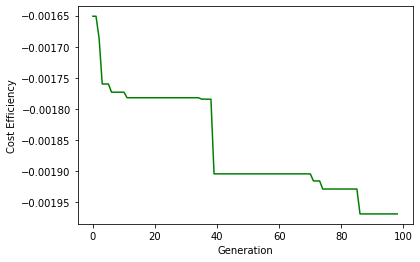

<Figure size 432x288 with 0 Axes>

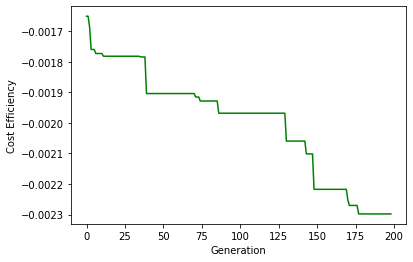

<Figure size 432x288 with 0 Axes>

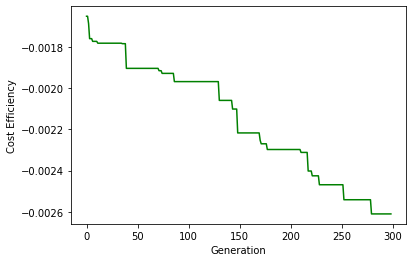

<Figure size 432x288 with 0 Axes>

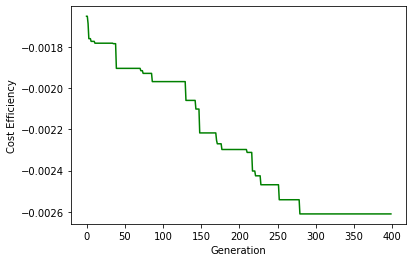

<Figure size 432x288 with 0 Axes>

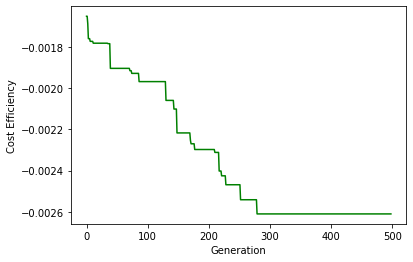

<Figure size 432x288 with 0 Axes>

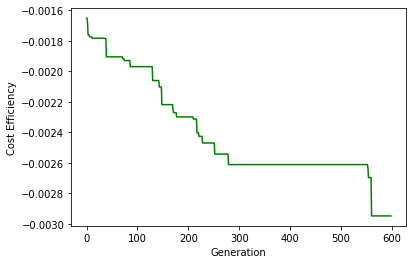

<Figure size 432x288 with 0 Axes>

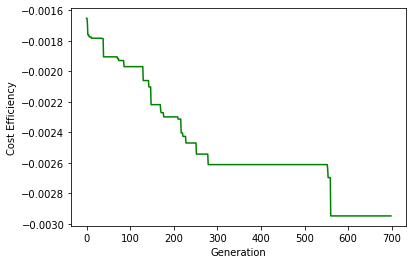

<Figure size 432x288 with 0 Axes>

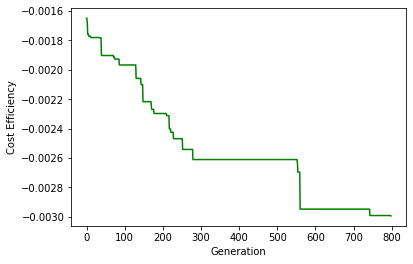

<Figure size 432x288 with 0 Axes>

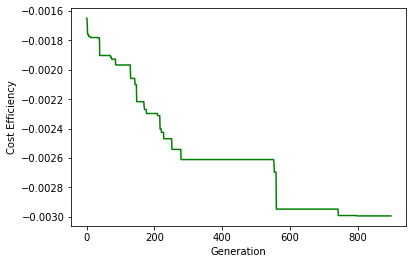

<Figure size 432x288 with 0 Axes>

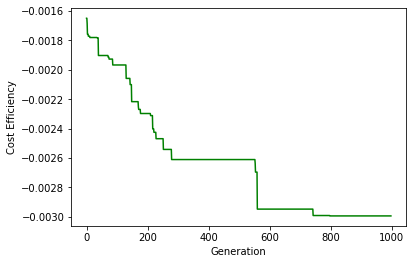

<Figure size 432x288 with 0 Axes>

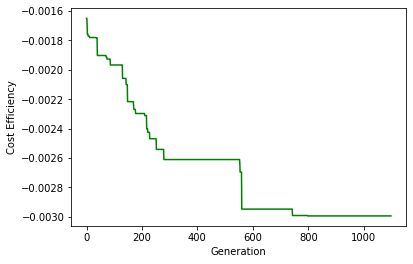

<Figure size 432x288 with 0 Axes>

In [ ]:
depot4_best_CE.run()

In [ ]:
print(f'depot4 cost efficiency: {depot4_best_CE.gbest.pbest_cost}\t| gbest: {depot4_best_CE.gbest.pbest}')

depot4 cost efficiency: -0.0029933259345637474	| gbest: [[243.0, 49824.8895, 6232.94834, 0.6699999999999999], [308.0, 49753.8897, 6400.09523, 0.6799999999999999], [387.0, 49684.5838, 6432.4151600000005, 1.24], [77.0, 49774.1937, 6511.04225, 1.47], [82.0, 49502.1687, 6367.74391, 0.6], [459.0, 49840.9974, 6184.2102700000005, 1.98], [437.0, 49834.7224, 6200.48912, 0.94], [584.0, 49813.5126, 6325.888129999999, 0.21999999999999997], [511.0, 49814.96400000001, 6311.28026, 0.24], [146.0, 49672.917, 6287.68866, 1.45], [398.0, 49707.0031, 6224.93523, 0.89], [585.0, 49588.9002, 6332.6017600000005, 1.41], [255.0, 49608.419, 6298.8642, 0.16999999999999998], [632.0, 49497.599, 6352.24825, 1.24], [628.0, 49566.9214, 6404.6714, 1.27], [550.0, 49679.8212, 6334.12593, 0.45999999999999996], [113.0, 49716.5183, 6353.988579999999, 0.44999999999999996], [41.0, 49673.5864, 6466.53212, 1.03], [65.0, 49632.1341, 6462.64503, 0.72], [534.0, 49705.2897, 6485.58412, 1.19], [624.0, 49691.222, 6325.56722, 0.51], [5

**Viewing fourth depot's best cost efficiency lorries routes :**

(this output will be used to create the json solution file)

In [ ]:
d4 = depot(167,depot4_best_CE.gbest.pbest,3,1,1)
d4.divide_customers()
d4.assign_routes()
print(d4.cost_efficiency(),'\n')
d4.view_routes()

-0.0029933259345637474 



([[[167, 5],
   [243.0, 49824.8895, 6232.94834, 0.6699999999999999],
   [308.0, 49753.8897, 6400.09523, 0.6799999999999999],
   [387.0, 49684.5838, 6432.4151600000005, 1.24],
   [77.0, 49774.1937, 6511.04225, 1.47],
   [82.0, 49502.1687, 6367.74391, 0.6],
   [127, 0.3400000000000002]],
  [[167, 5],
   [459.0, 49840.9974, 6184.2102700000005, 1.98],
   [437.0, 49834.7224, 6200.48912, 0.94],
   [584.0, 49813.5126, 6325.888129999999, 0.21999999999999997],
   [511.0, 49814.96400000001, 6311.28026, 0.24],
   [146.0, 49672.917, 6287.68866, 1.45],
   [127, 0.17000000000000015]],
  [[167, 5],
   [398.0, 49707.0031, 6224.93523, 0.89],
   [585.0, 49588.9002, 6332.6017600000005, 1.41],
   [255.0, 49608.419, 6298.8642, 0.16999999999999998],
   [632.0, 49497.599, 6352.24825, 1.24],
   [628.0, 49566.9214, 6404.6714, 1.27],
   [127, 0.02000000000000024]]],
 [[[167, 12],
   [550.0, 49679.8212, 6334.12593, 0.45999999999999996],
   [113.0, 49716.5183, 6353.988579999999, 0.44999999999999996],
   [41.0, 49

**depot 5 :**

In [ ]:
depot5_best_CE = PSO(127,iterations=1200, population_size=10, pbest_probability=0.9, gbest_probability=0.02, customers_list = depot5_customers_list,sml_lorry_no=2,
med_lorry_no=2,larg_lorry_no=1)

initial cost efficiency is -0.001163941297646485


<Figure size 432x288 with 0 Axes>

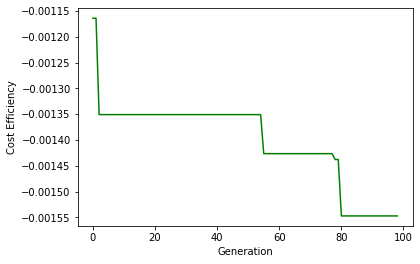

<Figure size 432x288 with 0 Axes>

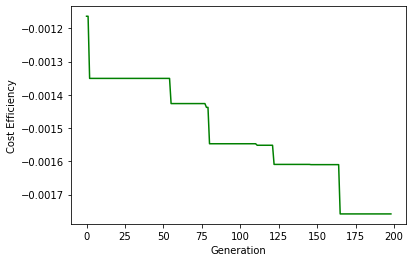

<Figure size 432x288 with 0 Axes>

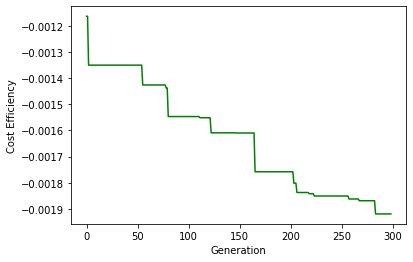

<Figure size 432x288 with 0 Axes>

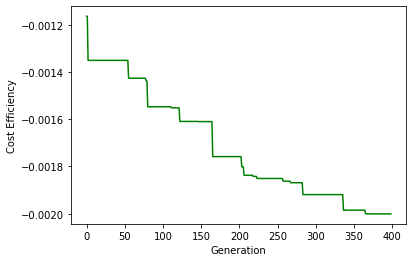

<Figure size 432x288 with 0 Axes>

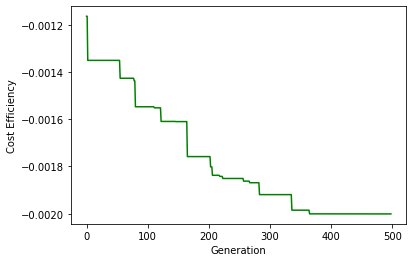

<Figure size 432x288 with 0 Axes>

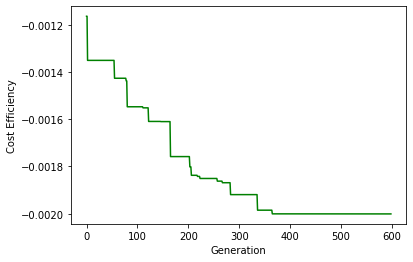

<Figure size 432x288 with 0 Axes>

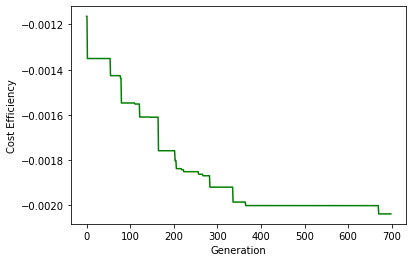

<Figure size 432x288 with 0 Axes>

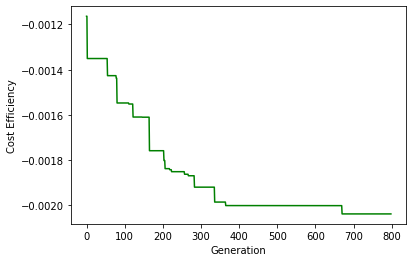

<Figure size 432x288 with 0 Axes>

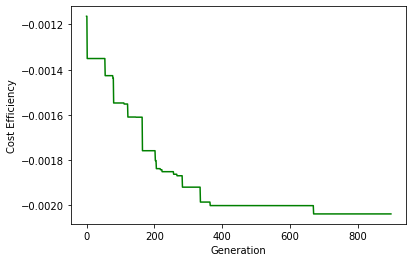

<Figure size 432x288 with 0 Axes>

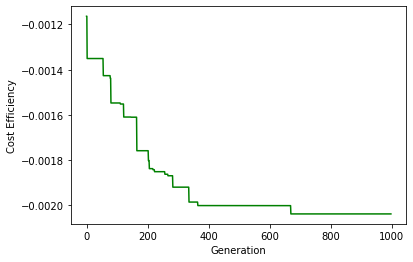

<Figure size 432x288 with 0 Axes>

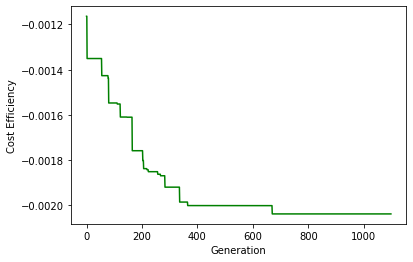

<Figure size 432x288 with 0 Axes>

In [ ]:
depot5_best_CE.run()

In [ ]:
print(f'depot5 cost efficiency: {depot5_best_CE.gbest.pbest_cost}\t| gbest: {depot5_best_CE.gbest.pbest}')

depot5 cost efficiency: -0.002037400411989388	| gbest: [[377.0, 49651.4758, 6057.461829999999, 0.95], [598.0, 49764.4067, 6108.50137, 0.97], [105.0, 49883.2837, 6070.6047, 1.27], [171.0, 49866.4031, 6020.648029999999, 1.3199999999999998], [418.0, 49805.6315, 5911.09094, 0.32999999999999996], [271.0, 49668.6461, 6143.0441, 0.9], [110.0, 49783.4373, 6102.62313, 1.99], [274.0, 49684.7599, 6101.44771, 0.16999999999999993], [547.0, 49686.5358, 6004.331999999999, 0.95], [446.0, 49765.5214, 5888.0572, 0.94], [214.0, 49803.8286, 6056.41074, 1.6099999999999999], [397.0, 49842.8132, 5990.08815, 0.7], [210.0, 49887.7803, 6084.00545, 0.47], [245.0, 49815.6403, 5853.41511, 0.15000000000000002], [32.0, 49916.416, 6137.33568, 0.92], [73.0, 49919.8675, 6165.40194, 0.22999999999999998], [64.0, 49853.9758, 6142.6863, 0.96], [528.0, 49809.2082, 6148.78966, 0.12], [200.0, 49637.3721, 6023.89652, 0.27], [13.0, 49609.499, 6060.54337, 0.19999999999999996], [621.0, 49712.1636, 6153.84308, 0.24], [337.0, 49631

**Viewing fifth depot's best cost efficiency lorries routes :**

(this output will be used to create the json solution file)

In [ ]:
d5 = depot(127,depot5_best_CE.gbest.pbest,2,2,1)
d5.divide_customers()
d5.assign_routes()
print(d5.cost_efficiency(),'\n')
d5.view_routes()

-0.002037400411989388 



([[[127, 5],
   [377.0, 49651.4758, 6057.461829999999, 0.95],
   [598.0, 49764.4067, 6108.50137, 0.97],
   [105.0, 49883.2837, 6070.6047, 1.27],
   [171.0, 49866.4031, 6020.648029999999, 1.3199999999999998],
   [418.0, 49805.6315, 5911.09094, 0.32999999999999996],
   [124, 0.16000000000000025]],
  [[127, 5],
   [271.0, 49668.6461, 6143.0441, 0.9],
   [110.0, 49783.4373, 6102.62313, 1.99],
   [274.0, 49684.7599, 6101.44771, 0.16999999999999993],
   [547.0, 49686.5358, 6004.331999999999, 0.95],
   [446.0, 49765.5214, 5888.0572, 0.94],
   [124, 0.0499999999999996]]],
 [[[127, 12],
   [214.0, 49803.8286, 6056.41074, 1.6099999999999999],
   [397.0, 49842.8132, 5990.08815, 0.7],
   [210.0, 49887.7803, 6084.00545, 0.47],
   [245.0, 49815.6403, 5853.41511, 0.15000000000000002],
   [32.0, 49916.416, 6137.33568, 0.92],
   [167, 8.15]],
  [[127, 12],
   [73.0, 49919.8675, 6165.40194, 0.22999999999999998],
   [64.0, 49853.9758, 6142.6863, 0.96],
   [528.0, 49809.2082, 6148.78966, 0.12],
   [200.0,

**Thus, max cost efficiency for all previous depots will be the absolute value of the optimized values. And the overall max cost efficiency for the delivery will be the sum of these absolut values.**

**Discuss Particle Swarm Optimization Algorithm Results :**

Comparing with genetic algorithm, PSO algorithm optimizing was much longer. and it is possible to obtain better results than the displayed ones by increasing the number of iterations, where no minimum values had been reached in last generations.

Increasing of population size will help to start the optimization with better results as discussed before in GA. However, this will increase the computational complexity as well.

Unlike GA, next generations of PSO will not have higher results than the previous ones. And this is due to storing best results for each particle as well as the best result for the whole population.

pbest_probability and gbest_probability values will affect in the velocities of the particles.  And  particles velocities  in our case is changing the order of some customers in the customeres list of a particle (particle's route). Thus, similar to crossover in GA, too much increasing of these probabilities values will increase the randomly changing of a particle route which will not be good for an optimization algorithm.

As disscussed before, because we divided the delivery problem equally between the depots, it will be rare for a lorry to run out of gas, and if that happend it would be for a small lorry. And from the results above we can see that no lorry had to refill gas. Hence, we know that the algorithm chose the routes to obtain the max cost efficinces.



**Conclusion :**

In this approach, the LPG delivery problem was solved using a combination of Genetic  and Particle Swarm Optimization algorithms. The Genetic algorithm was used to solve the first task, which involved minimising the overall dispatch time while taking the tanker lorry capacity and stops times into consideration. Particle swarm optimization connsequently, was used to solve the second problem, which involved maximising the cost efficiency. Using these two methods, we were able to find the most optimised solution for the tasks that were assigned to us. From the above results, we can conclude that the GA was much faster than the PSO in optimization.

**References :**

Gad, A., 2018. Introduction to Optimization with Genetic Algorithm. [Online] Available at: https://towardsdatascience.com/introduction-to-optimization-with-genetic- algorithm-2f5001d9964b [Accessed 04 01 2022].

Kuoa R, J. & Lib L, M., 2010. Application of a hybrid of genetic algorithm and particle swarm optimization algorithm for order clustering. Decision Support Systems, 49(4), pp. 451-462.

Kalyanmoy, D., Amrit, P. & Agarwal, S., 2002. A Fast and Elitist Multiobjective Genetic Algorithm: NSGA-II. IEEE TRANSACTIONS ON EVOLUTIONARY COMPUTATION, 6(2).

Kennedy, J. and Eberhart, R., 1995, November. Particle swarm optimization. In Proceedings of ICNN'95-international conference on neural networks (Vol. 4, pp. 1942-1948). IEEE.

Moradi M, H. & Abedini, M., 2011. A combination of genetic algorithm and particle swarm optimization for optimal DG location and sizing in distribution systems. International Journal of Electrical Power & Energy Systems, 34(1), pp. 66-74.

Tabassum, M. and Mathew, K., 2014. A genetic algorithm analysis towards optimization solutions. International Journal of Digital Information and Wireless Communications (IJDIWC), 4(1), pp.124-142.

Xin-She, Y., 2021. Genetic Algorithms. Textile Fibre Composites in Civil Engineering, 2016.